In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from matplotlib.pyplot import figure
from sklearn.datasets import load_wine
from itertools import combinations

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [142]:
data = load_wine()
X = data.data
y = data.target

In [162]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [161]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=42)
model_tree.fit(X_train, y_train)

prediction = model_tree.predict(X_test)

In [146]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap='gray_r',
                          linecolor='k'):

    fmt = '.3f' if normalize else 'd'
    sns.heatmap(cm, fmt=fmt, annot=True, square=True,
                xticklabels=classes, yticklabels=classes,
                cmap=cmap, vmin=0, vmax=0,
                linewidths=0.5, linecolor=linecolor,
                cbar=False)
    sns.despine(left=False, right=False, top=False, bottom=False)

    plt.title('Confusion Matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.tight_layout()
    plt.show()

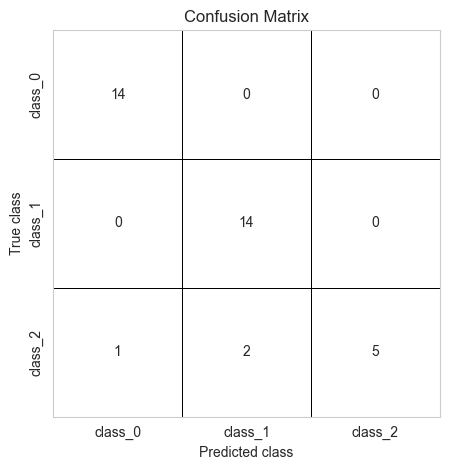

In [147]:
conf_mat = confusion_matrix(y_test, prediction)
plot_confusion_matrix(conf_mat, data.target_names)

In [148]:
print("Accuracy:" + str(model_tree.score(X_test, y_test).round(2) * 100) + "%")

Accuracy:92.0%


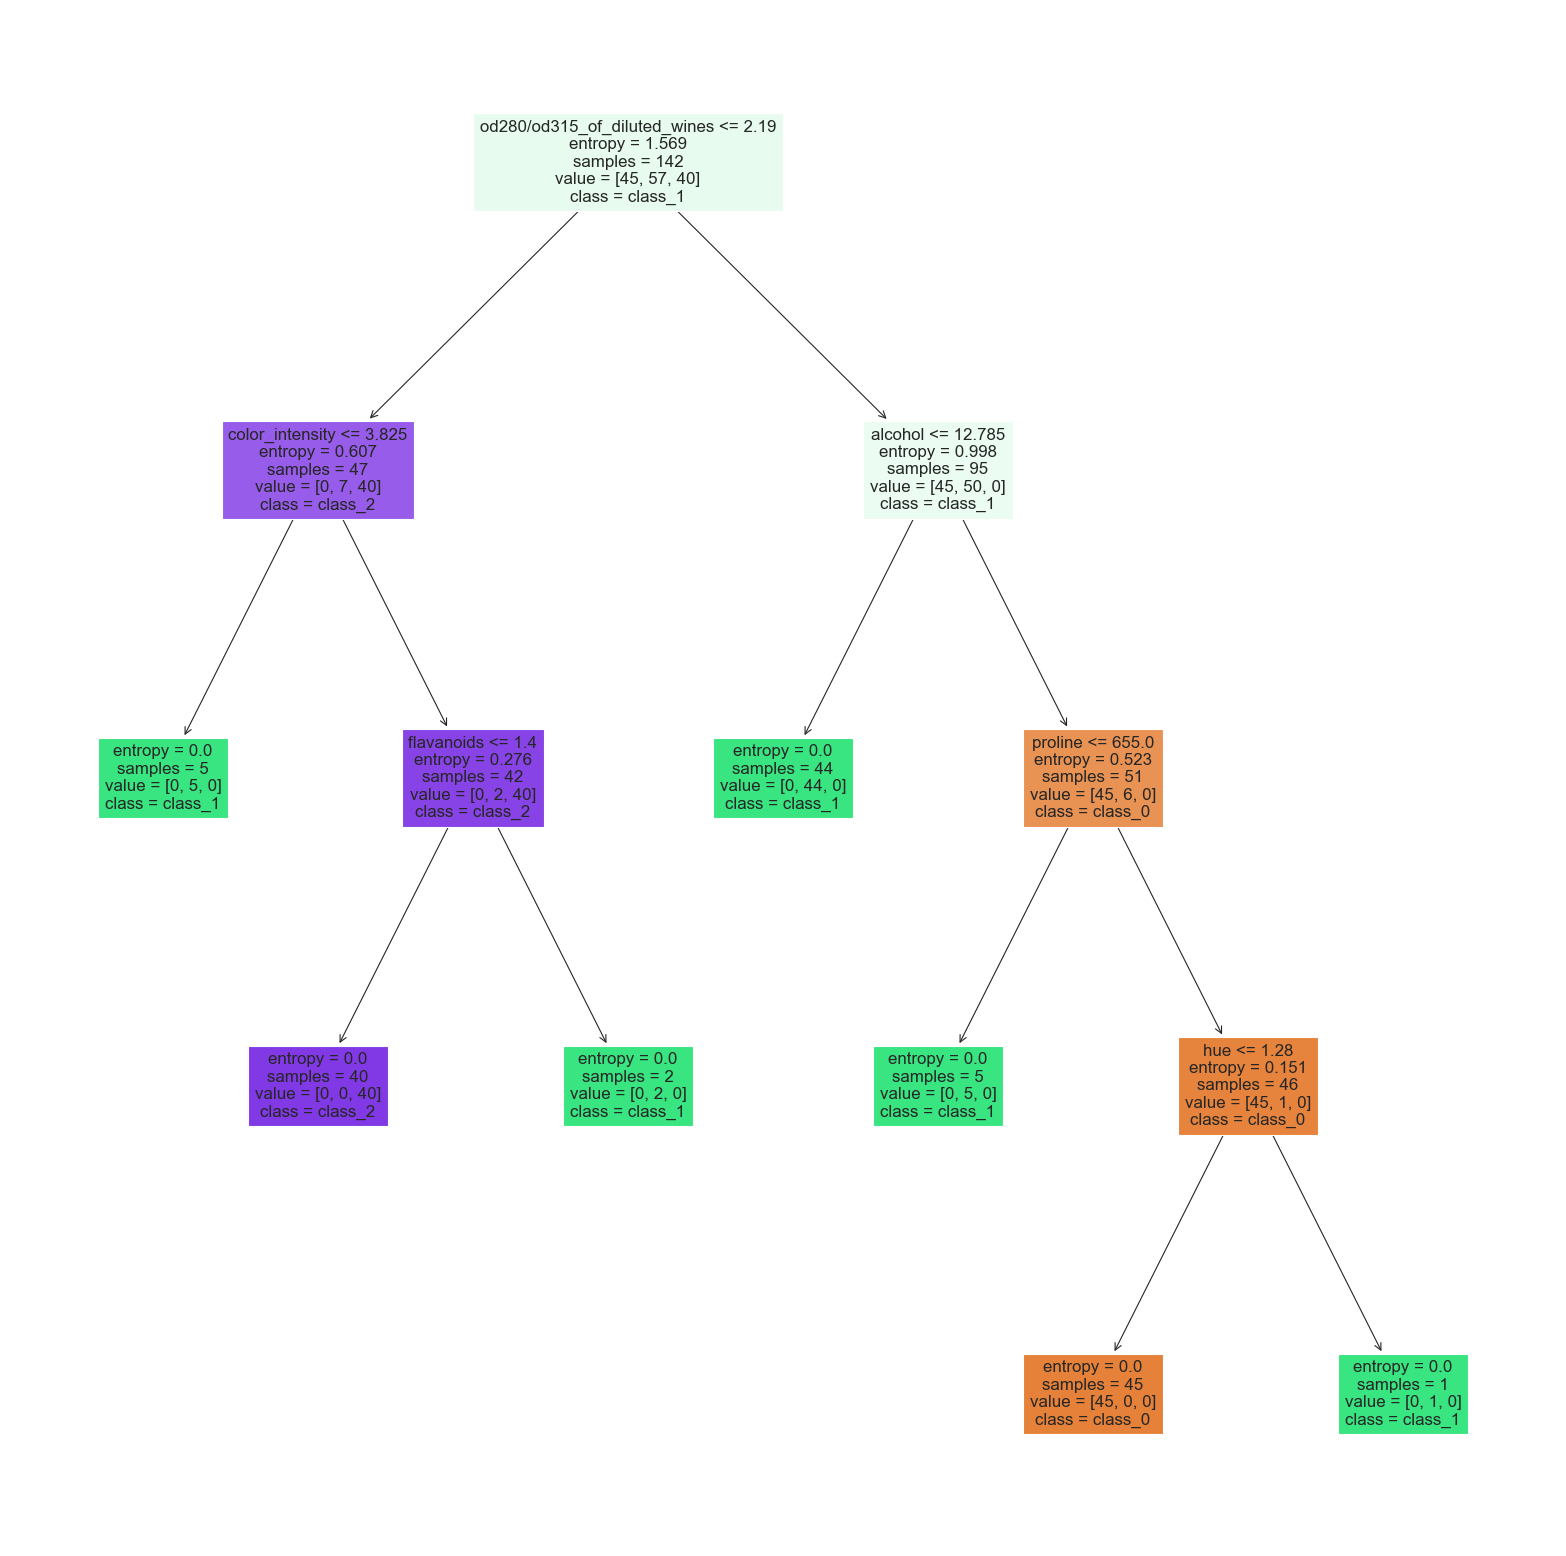

In [149]:
figure(figsize=(25, 25), dpi=80)
tree.plot_tree(model_tree, class_names=list(data.target_names), feature_names=list(data.feature_names), filled=True)
plt.show()

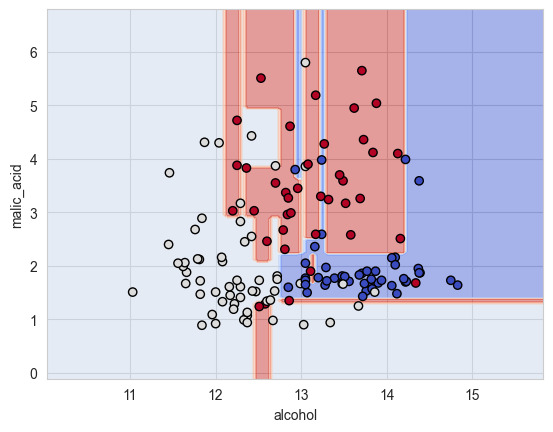

In [150]:
X_train_cols = X_train[:, :2] 
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, random_state=42).fit(X_train_cols, y_train)
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=data.feature_names[0], ylabel=data.feature_names[1],
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.show()

In [151]:
comb = combinations(np.arange(0, 13), 2)
unique_combinations = set(comb)
print(unique_combinations)
print(len(unique_combinations))

{(4, 9), (5, 10), (8, 9), (0, 5), (2, 11), (6, 11), (7, 10), (3, 6), (5, 12), (8, 11), (9, 10), (0, 7), (2, 4), (1, 8), (7, 12), (3, 8), (9, 12), (0, 9), (1, 10), (3, 10), (5, 7), (0, 2), (1, 3), (1, 12), (3, 12), (5, 9), (4, 11), (1, 5), (7, 9), (3, 5), (5, 11), (1, 7), (2, 6), (7, 11), (3, 7), (4, 6), (10, 12), (1, 9), (0, 11), (2, 8), (6, 8), (3, 9), (5, 6), (4, 8), (1, 2), (0, 4), (1, 11), (2, 10), (6, 10), (3, 11), (4, 10), (8, 10), (1, 4), (0, 6), (2, 3), (2, 12), (6, 12), (3, 4), (4, 12), (8, 12), (1, 6), (0, 8), (2, 5), (9, 11), (4, 5), (0, 1), (10, 11), (0, 10), (2, 7), (6, 7), (4, 7), (5, 8), (0, 3), (0, 12), (2, 9), (11, 12), (6, 9), (7, 8)}
78


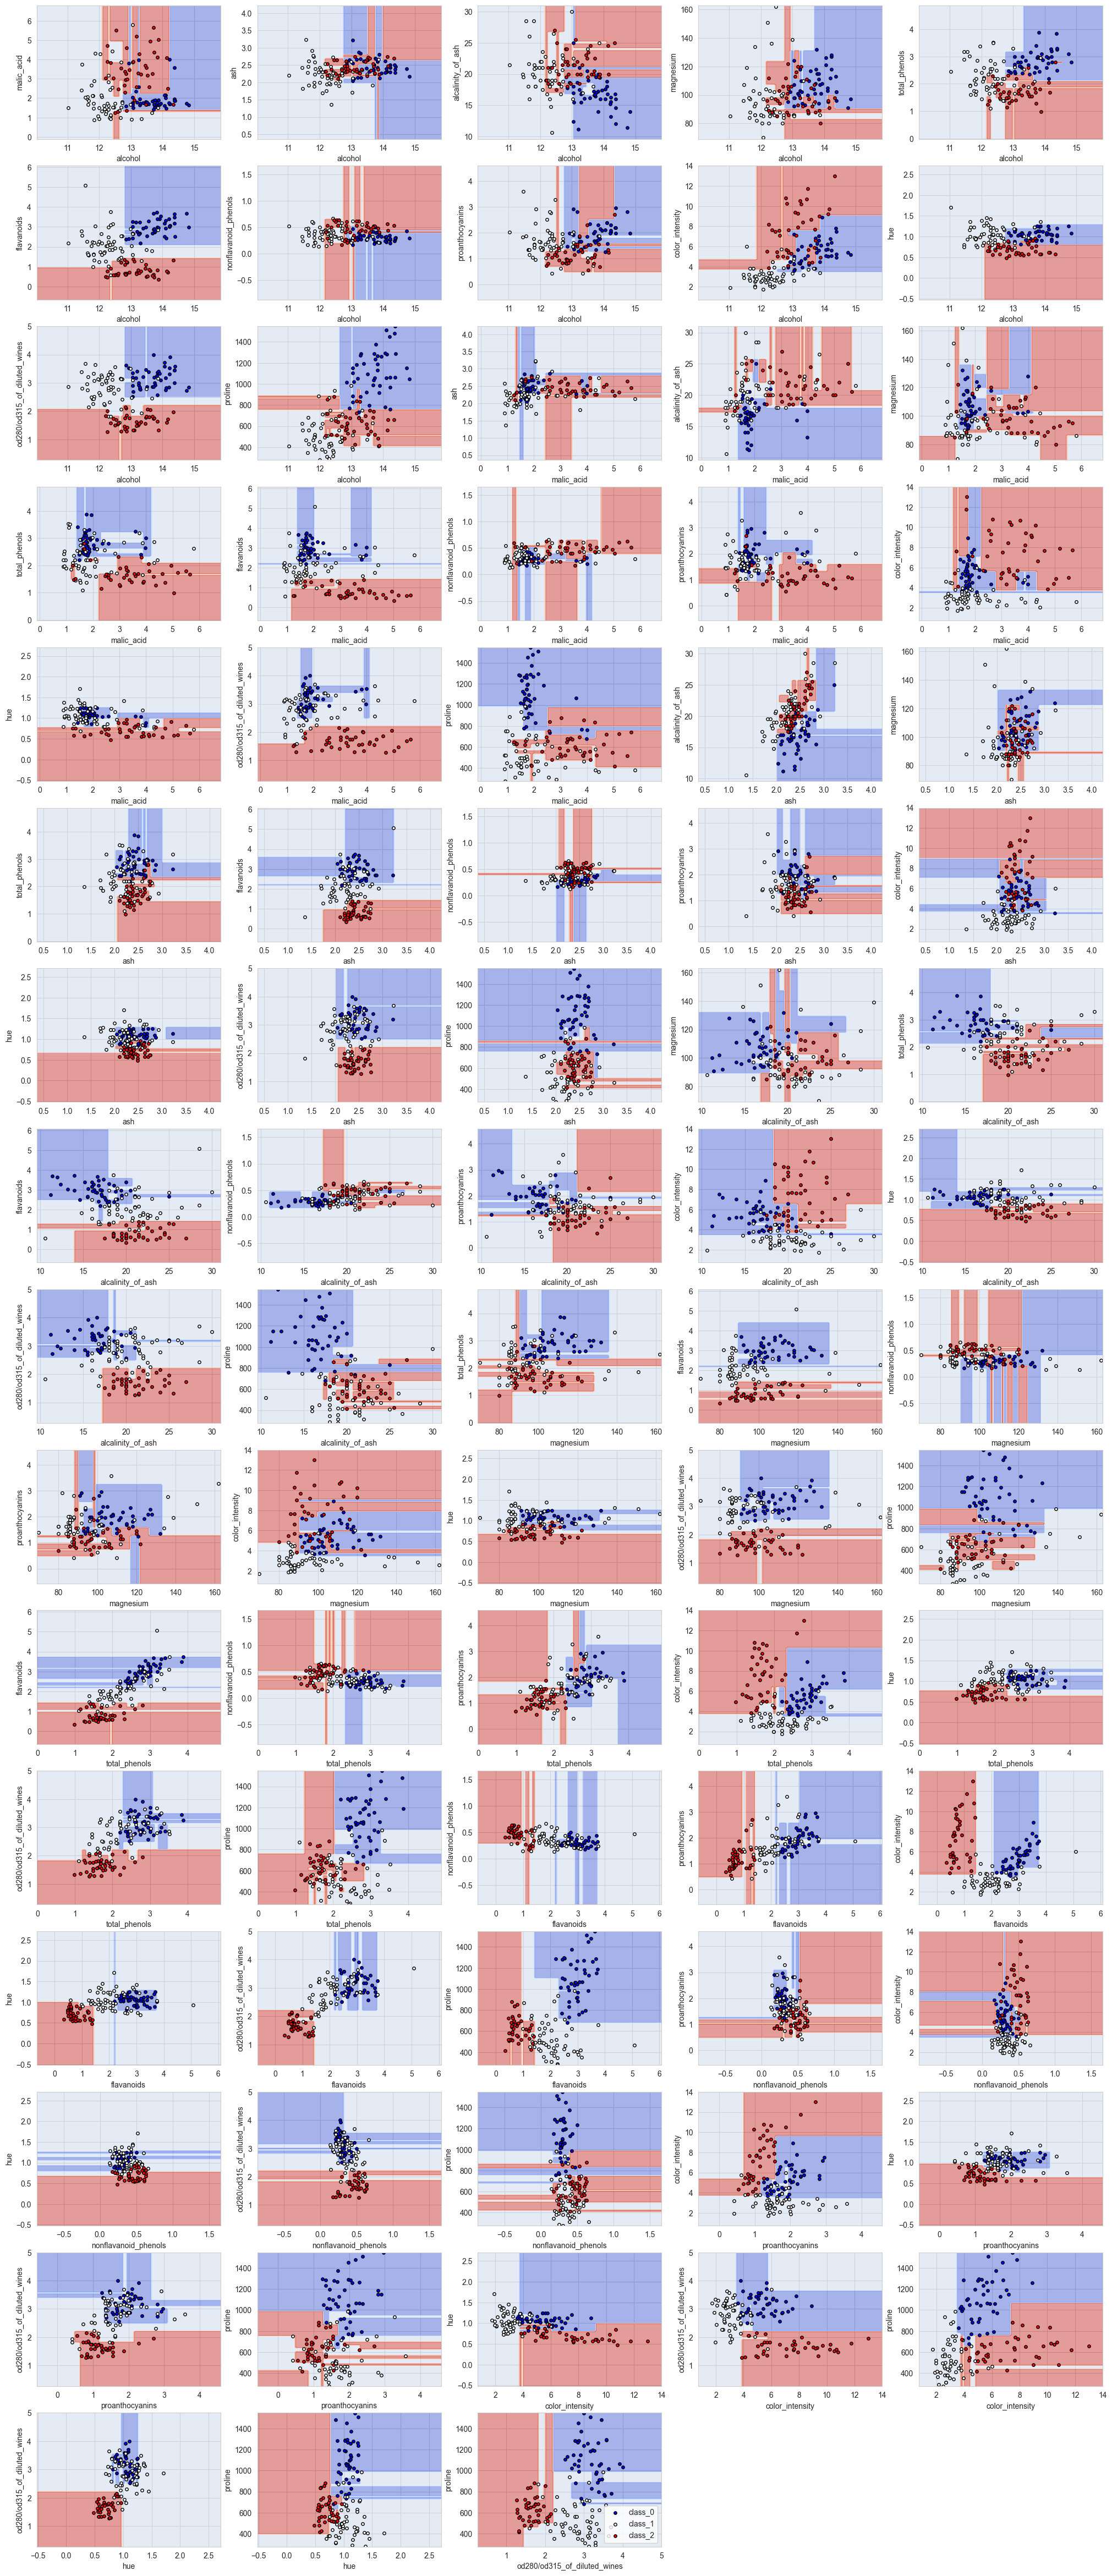

In [152]:
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red
plot_step = 0.02

plt.figure(figsize=(25, 60))

for pair_idx, pair in enumerate(sorted(unique_combinations)):

    X_train_cols = X_train[:, pair]

    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, 
                                        random_state=42).fit(X_train_cols, y_train)

    ax = plt.subplot(16, 5, pair_idx + 1)
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_train_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0],
                    X_train_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.legend(loc="lower right");

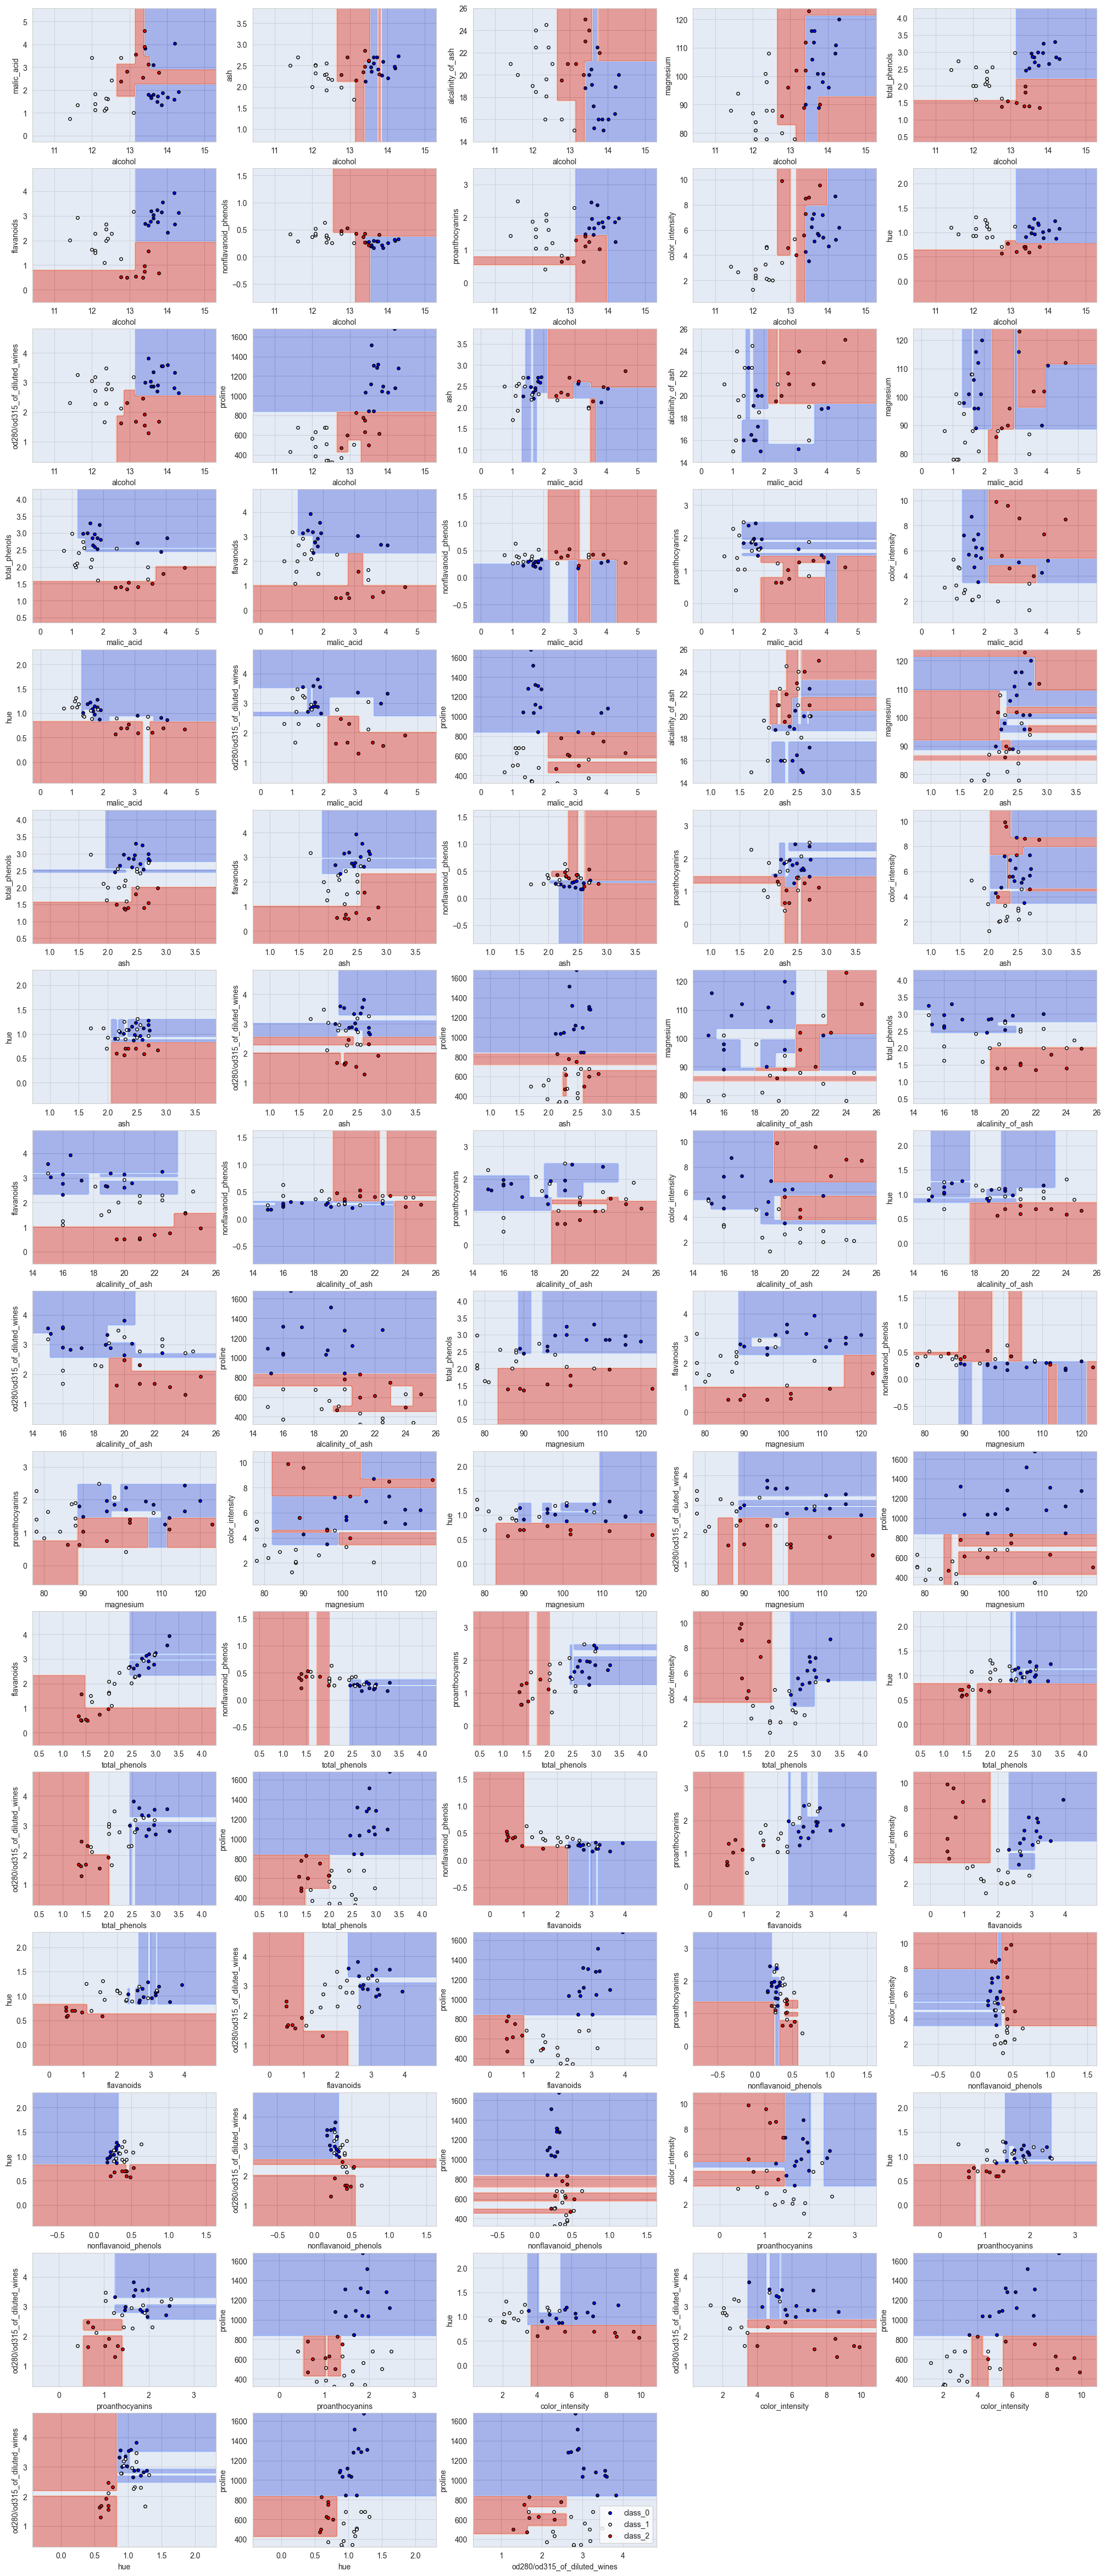

In [153]:
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red
plot_step = 0.02

plt.figure(figsize=(25, 60))

for pair_idx, pair in enumerate(sorted(unique_combinations)):

    X_test_cols = X_test[:, pair]

    classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, 
                                        random_state=42).fit(X_test_cols, y_test)

    ax = plt.subplot(16, 5, pair_idx + 1)
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_test_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_test == i)
        plt.scatter(X_test_cols[idx, 0],
                    X_test_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.legend(loc="lower right");

In [154]:
model_forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', max_depth=10, random_state=42)
model_forest.fit(X_train, y_train)

prediction = model_forest.predict(X_test)

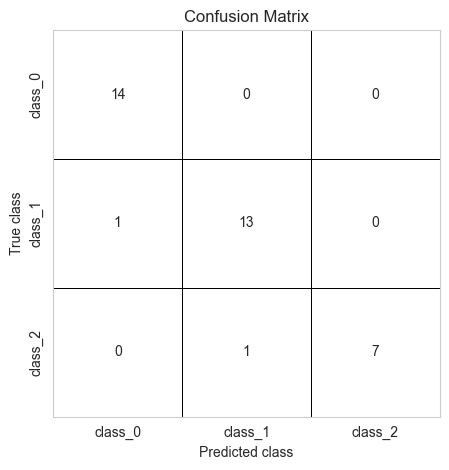

In [155]:
conf_mat = confusion_matrix(y_test, prediction)
plot_confusion_matrix(conf_mat, data.target_names)

In [156]:
print("Accuracy:" + str(model_forest.score(X_test, y_test).round(2) * 100) + "%")

Accuracy:94.0%


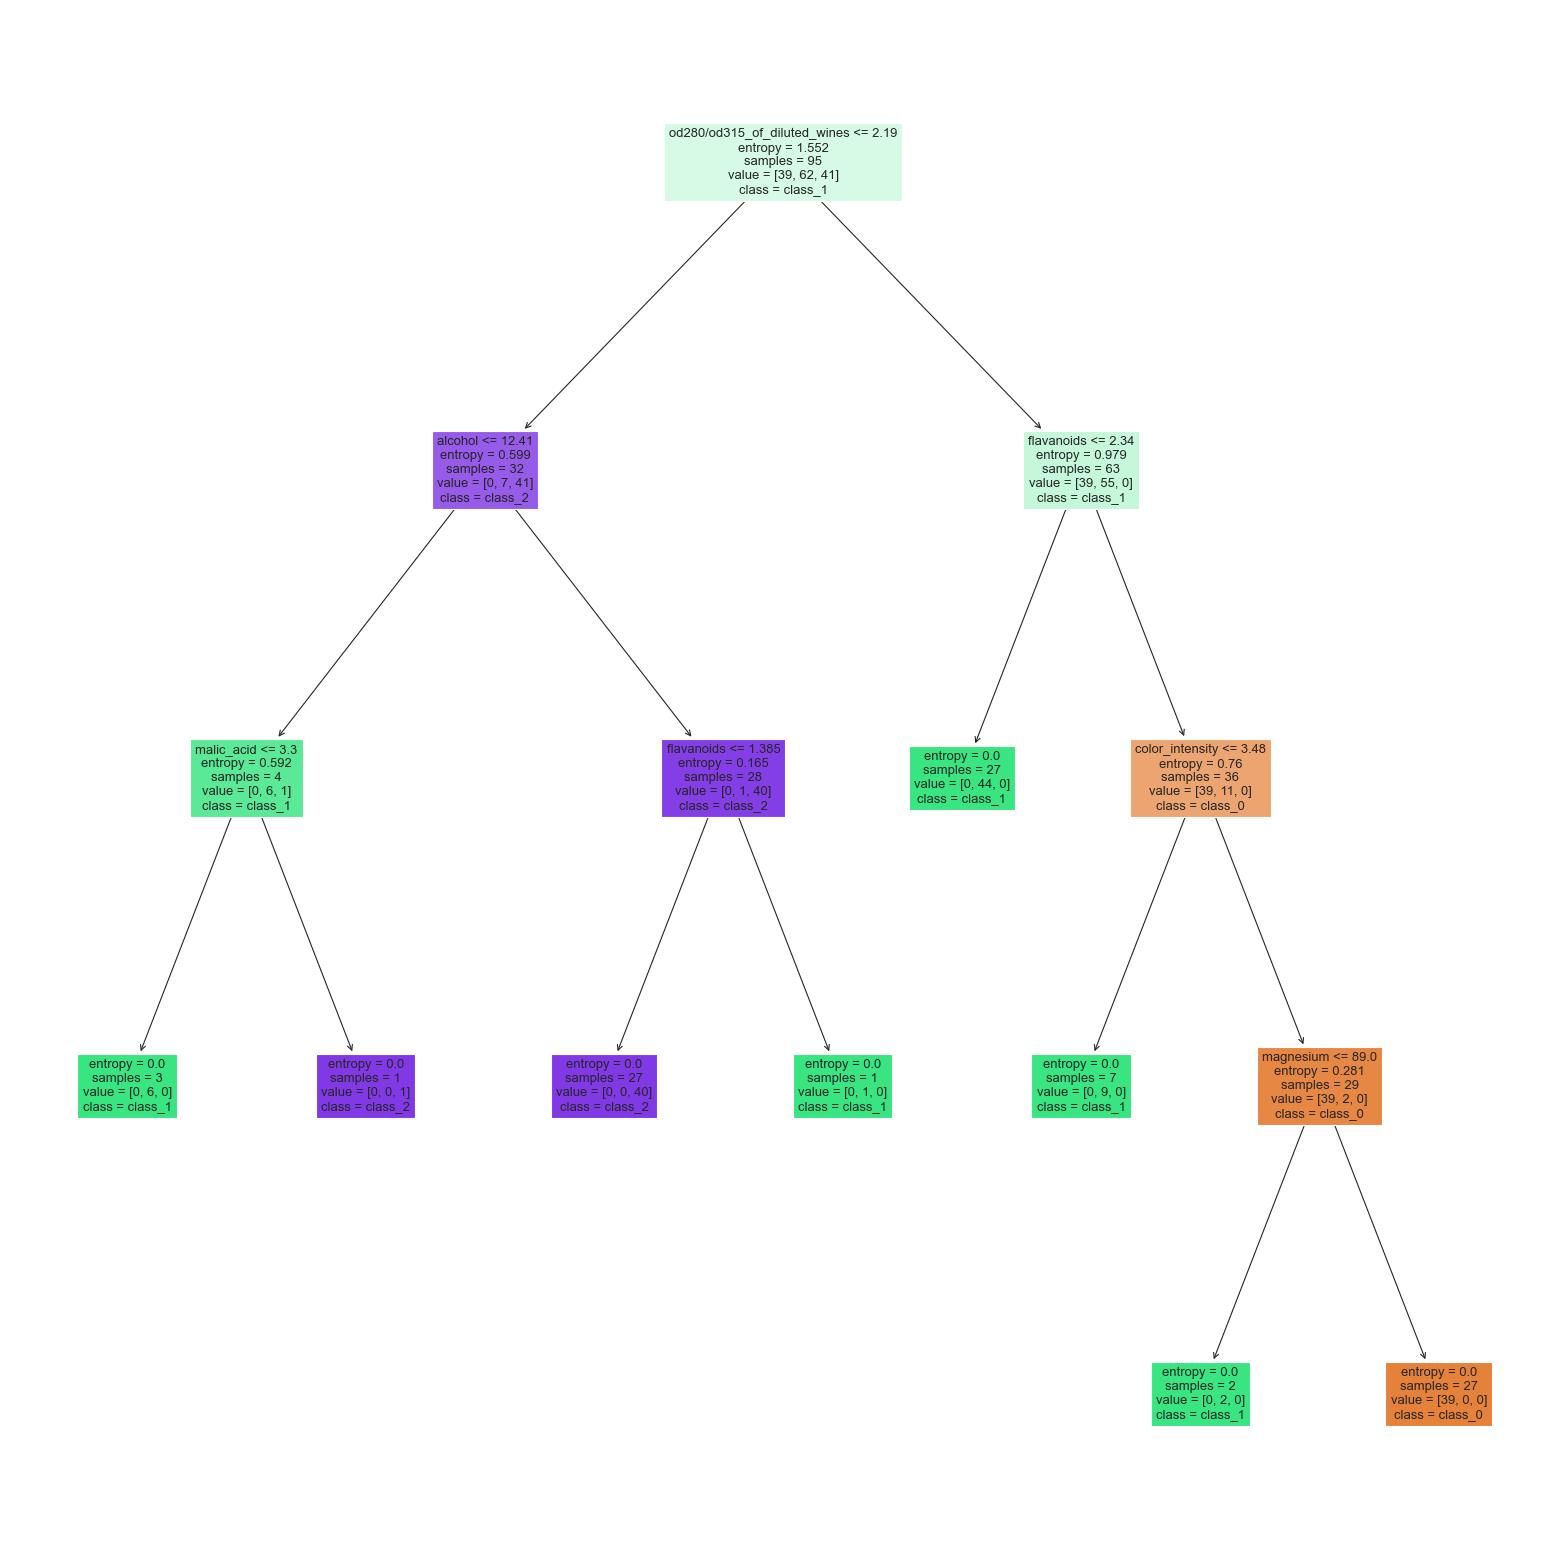

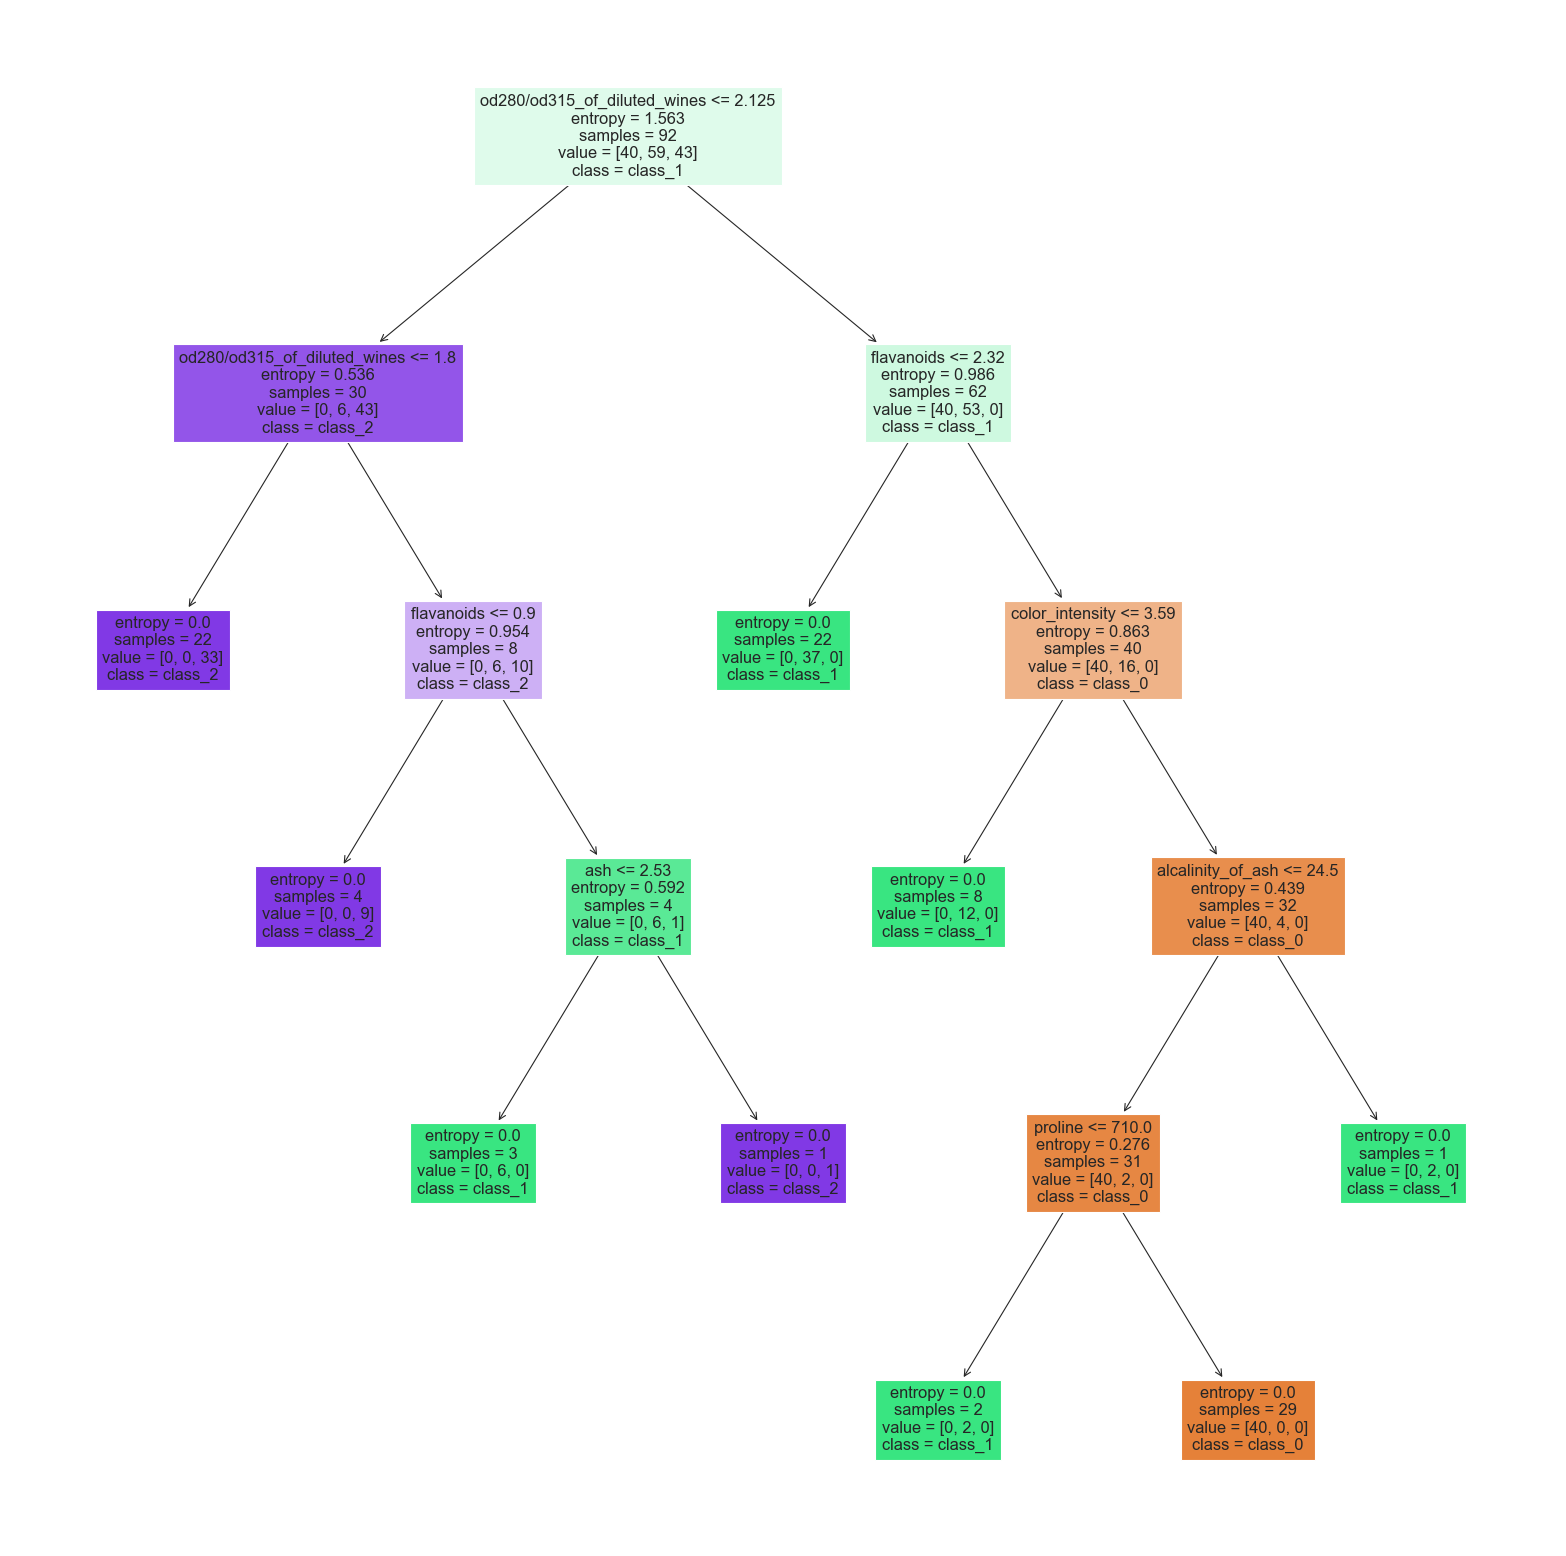

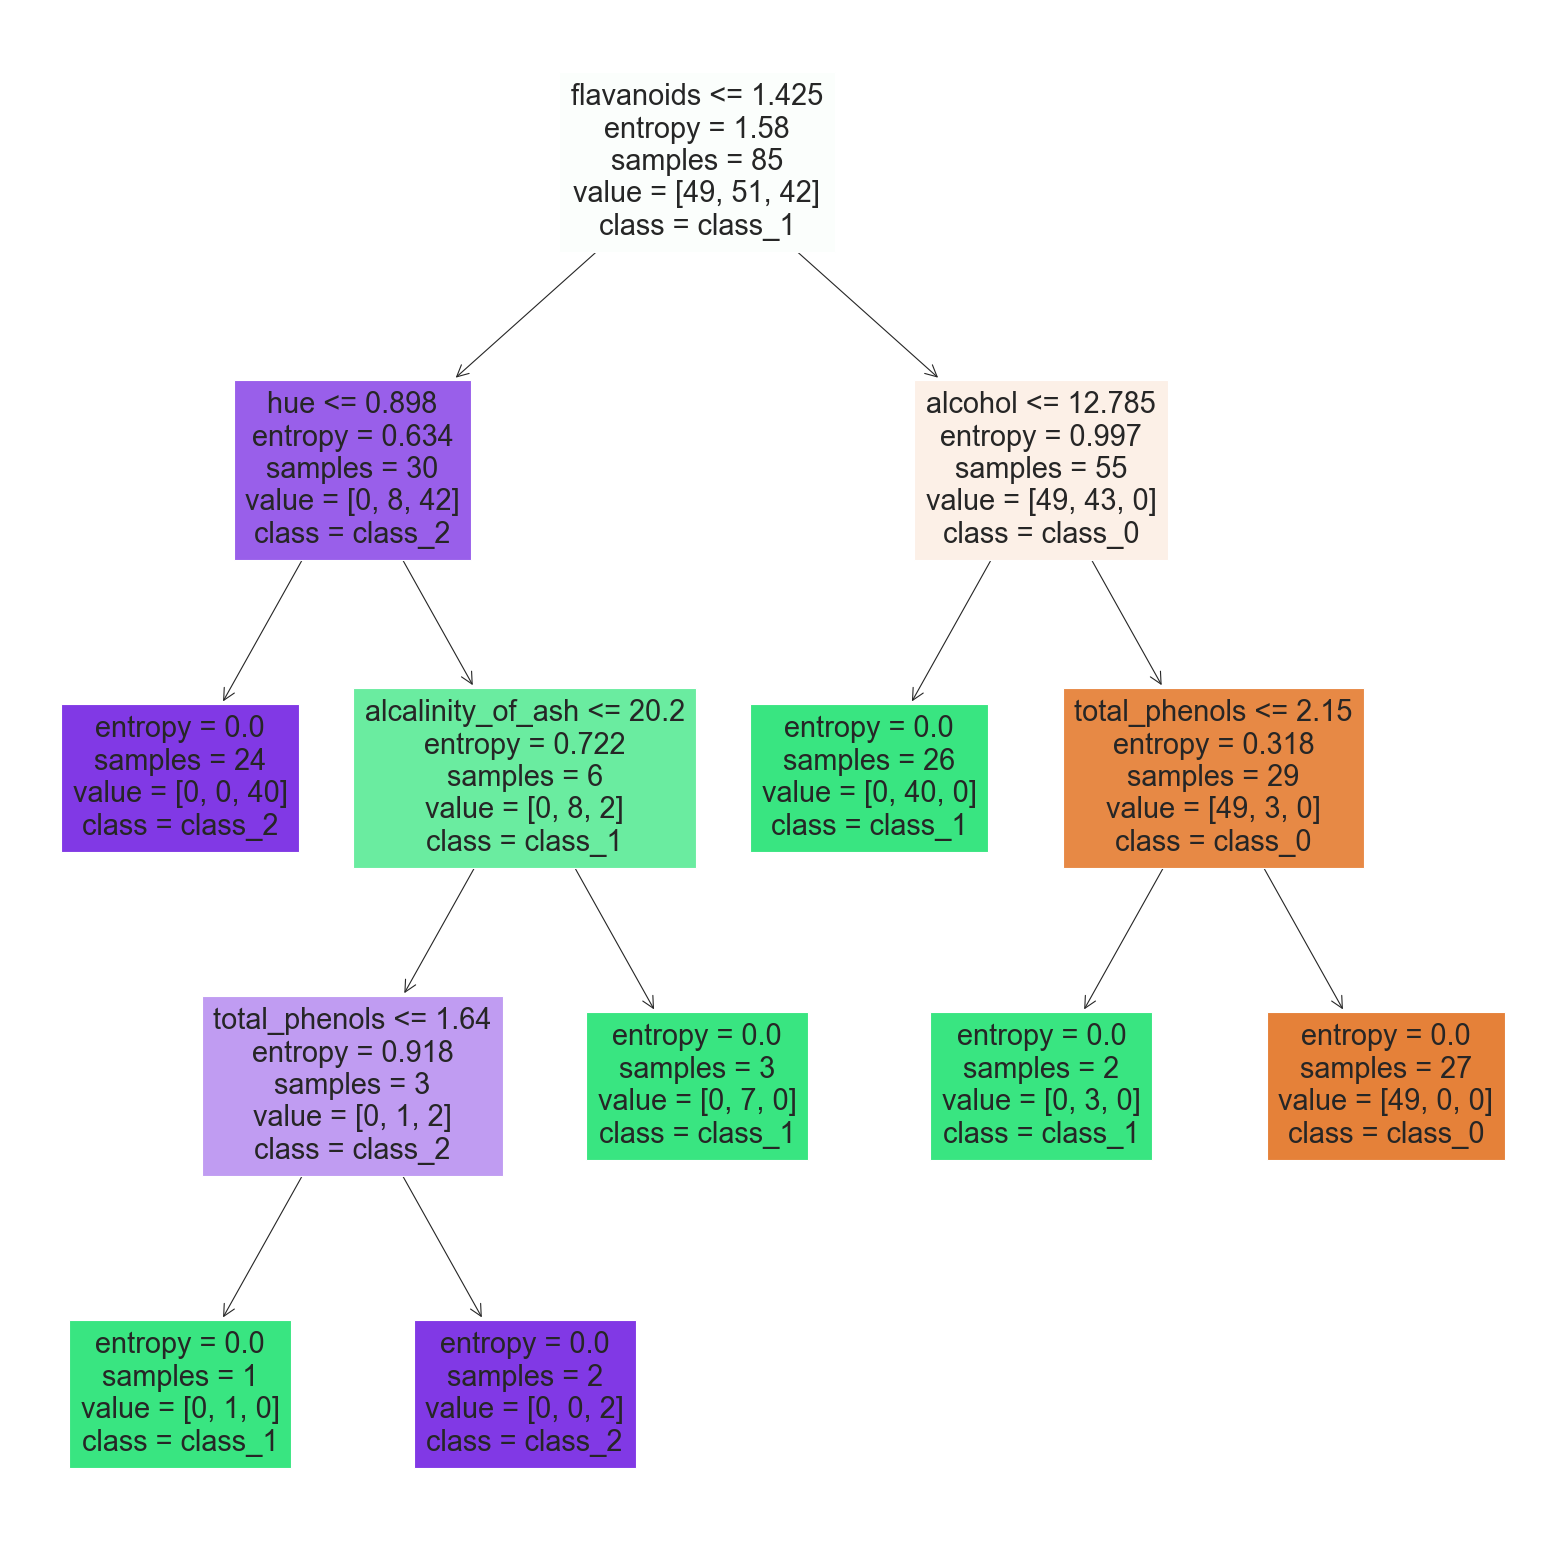

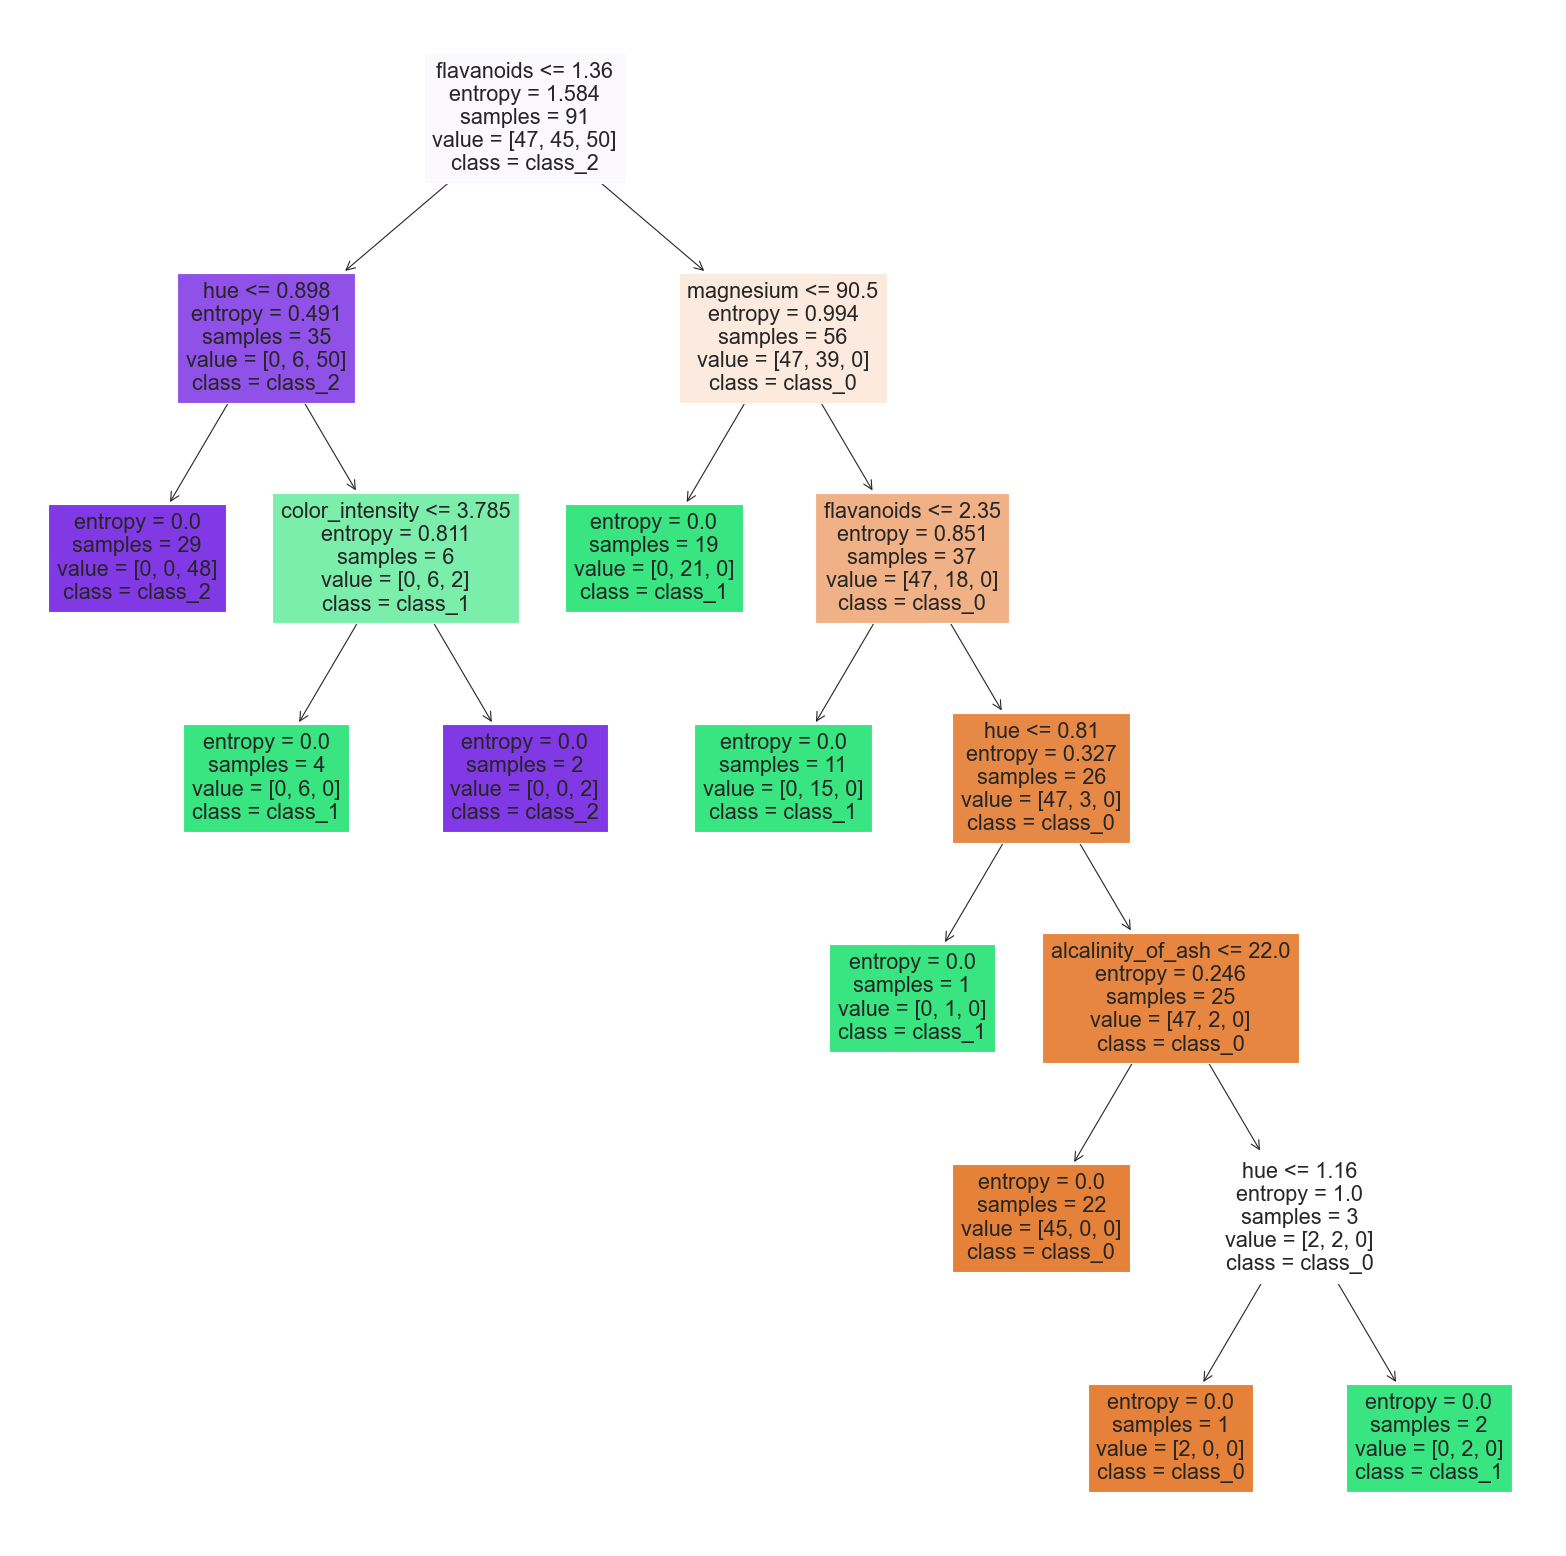

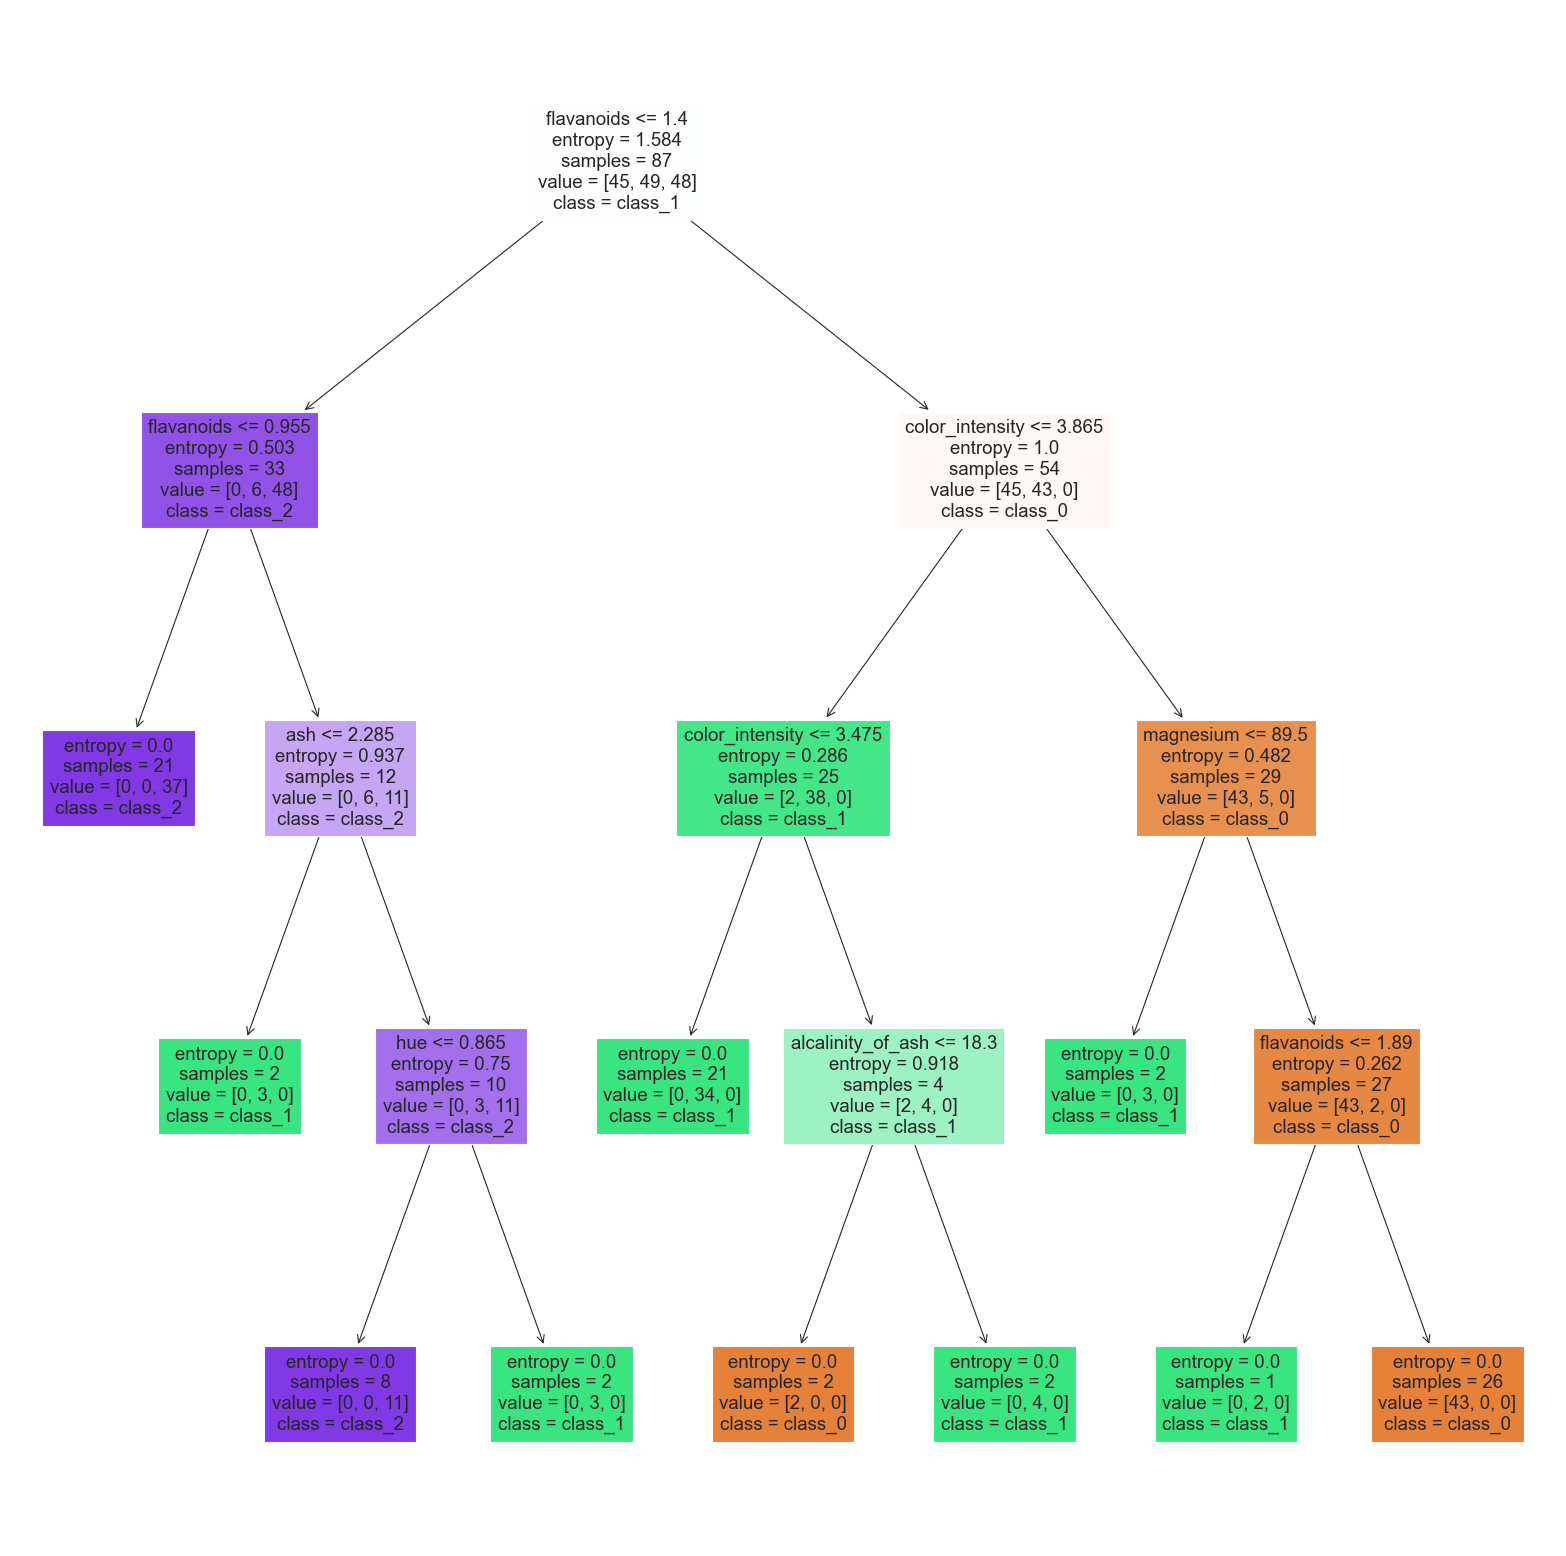

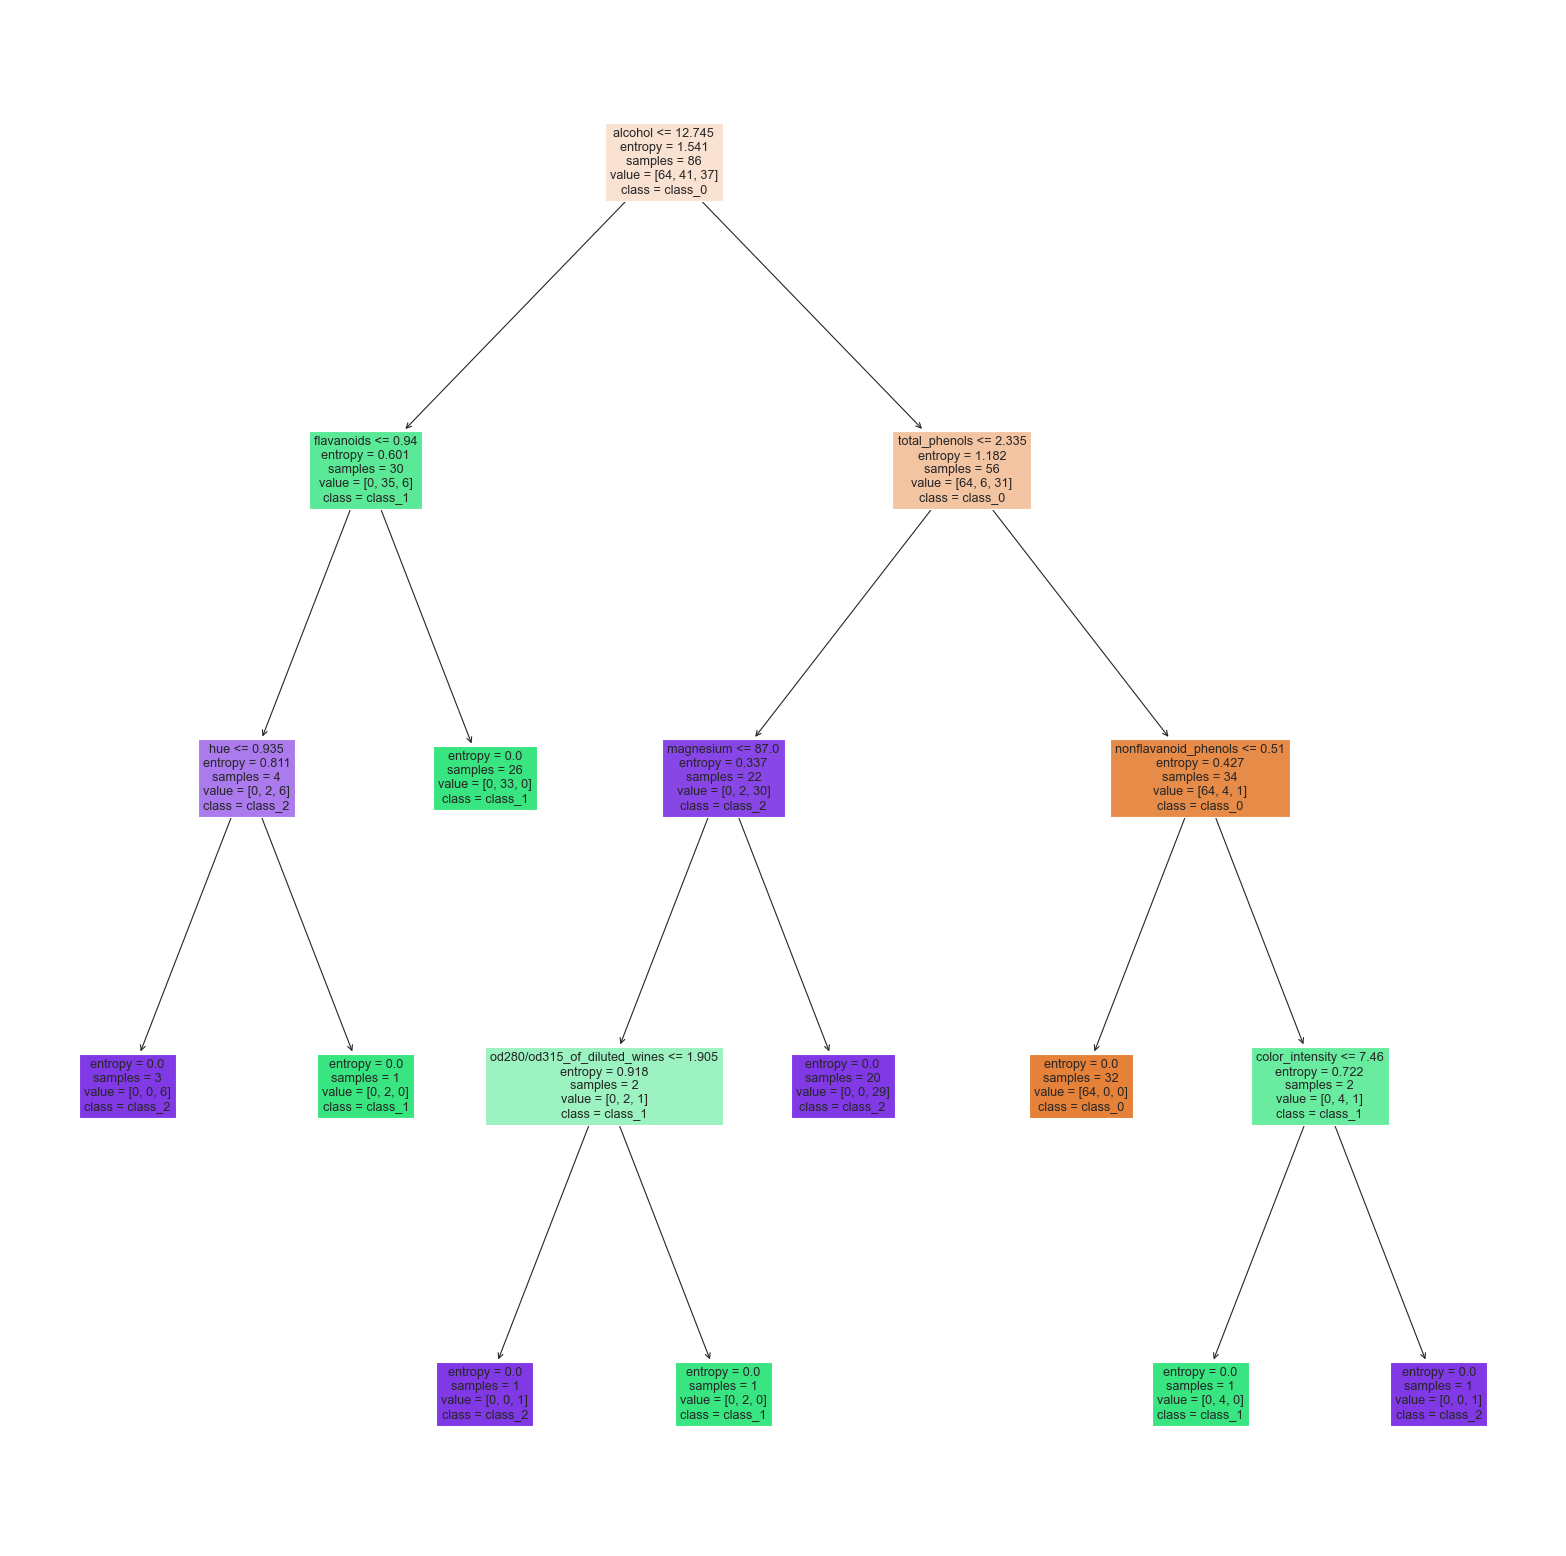

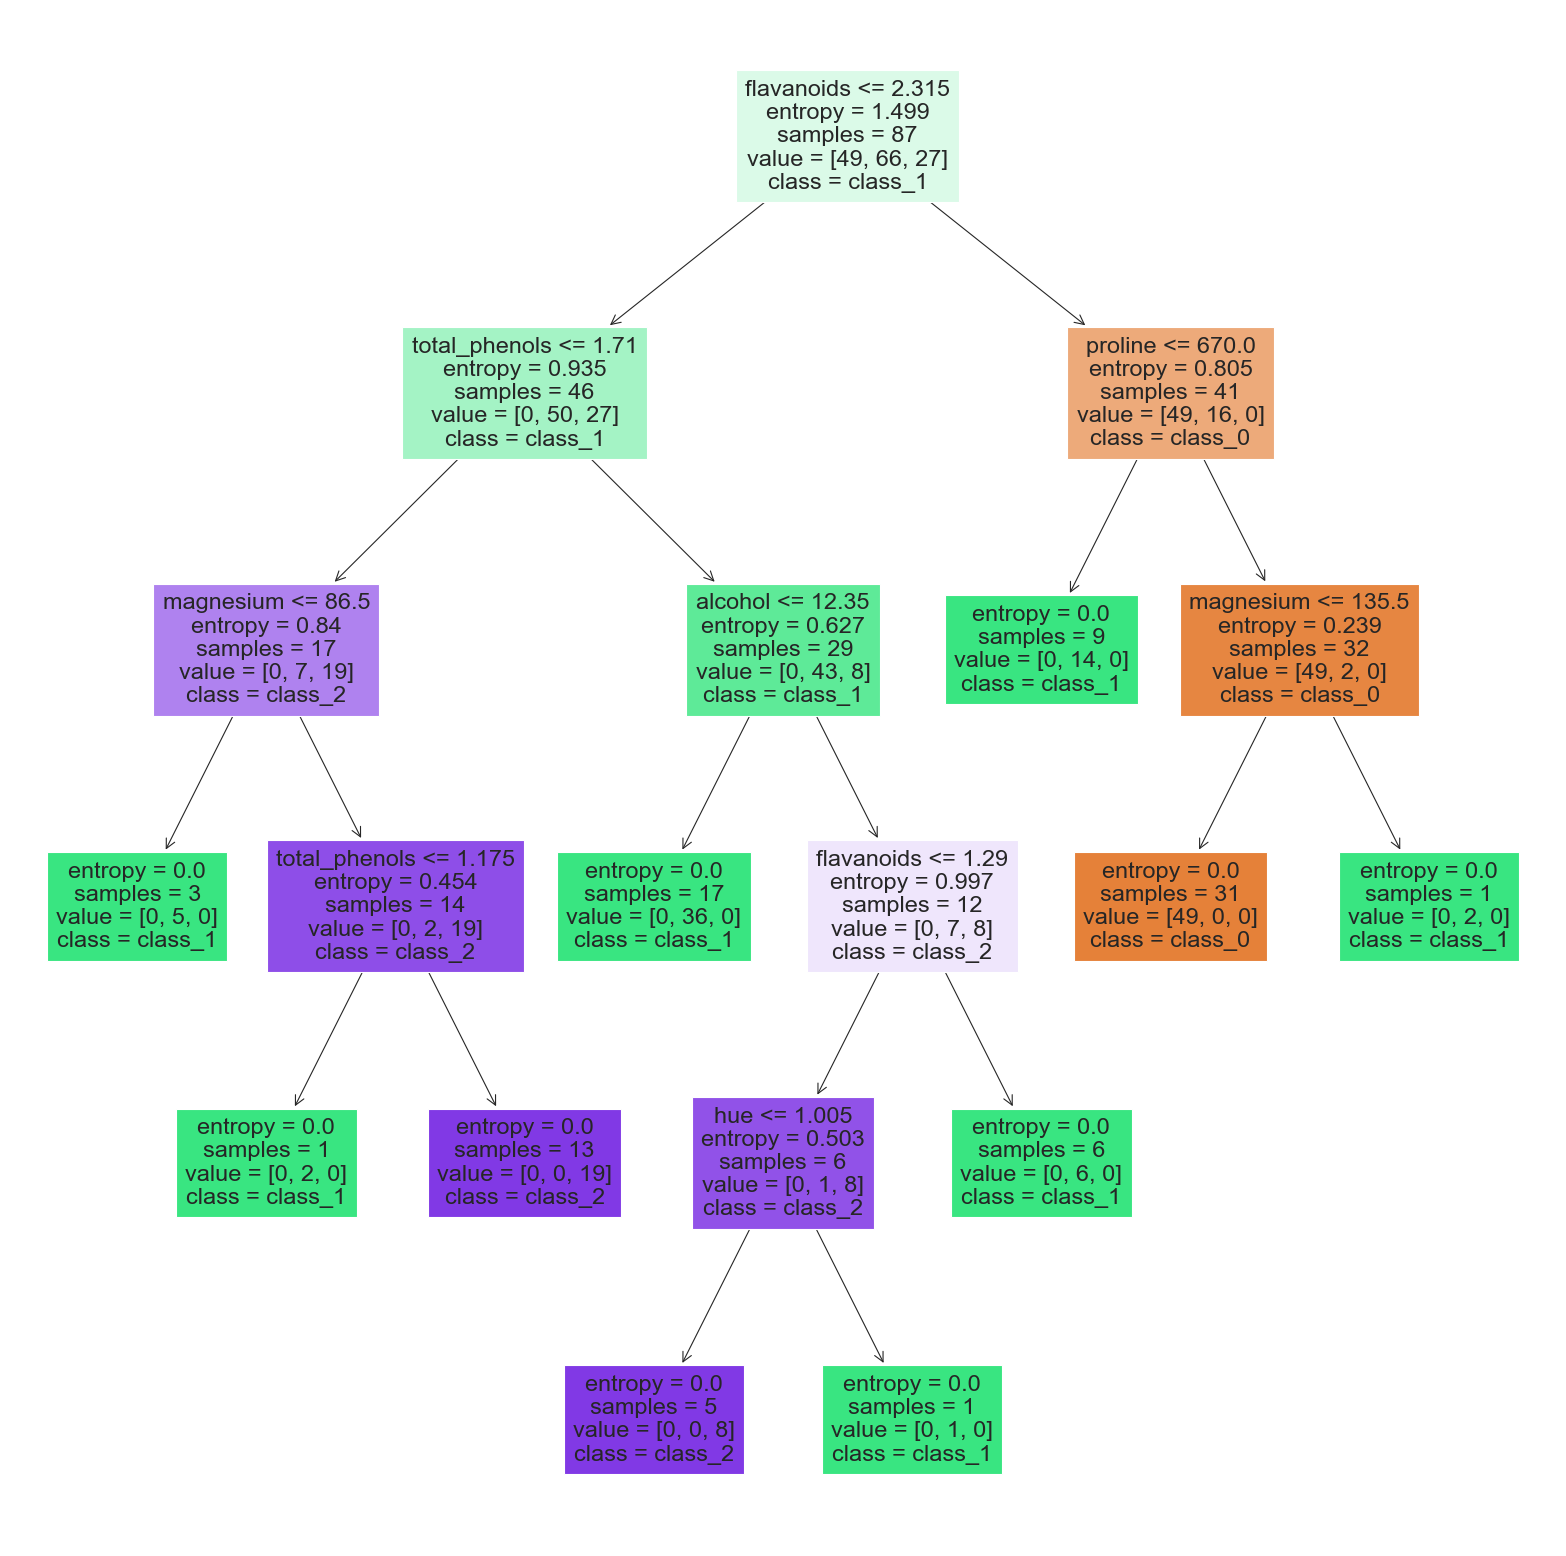

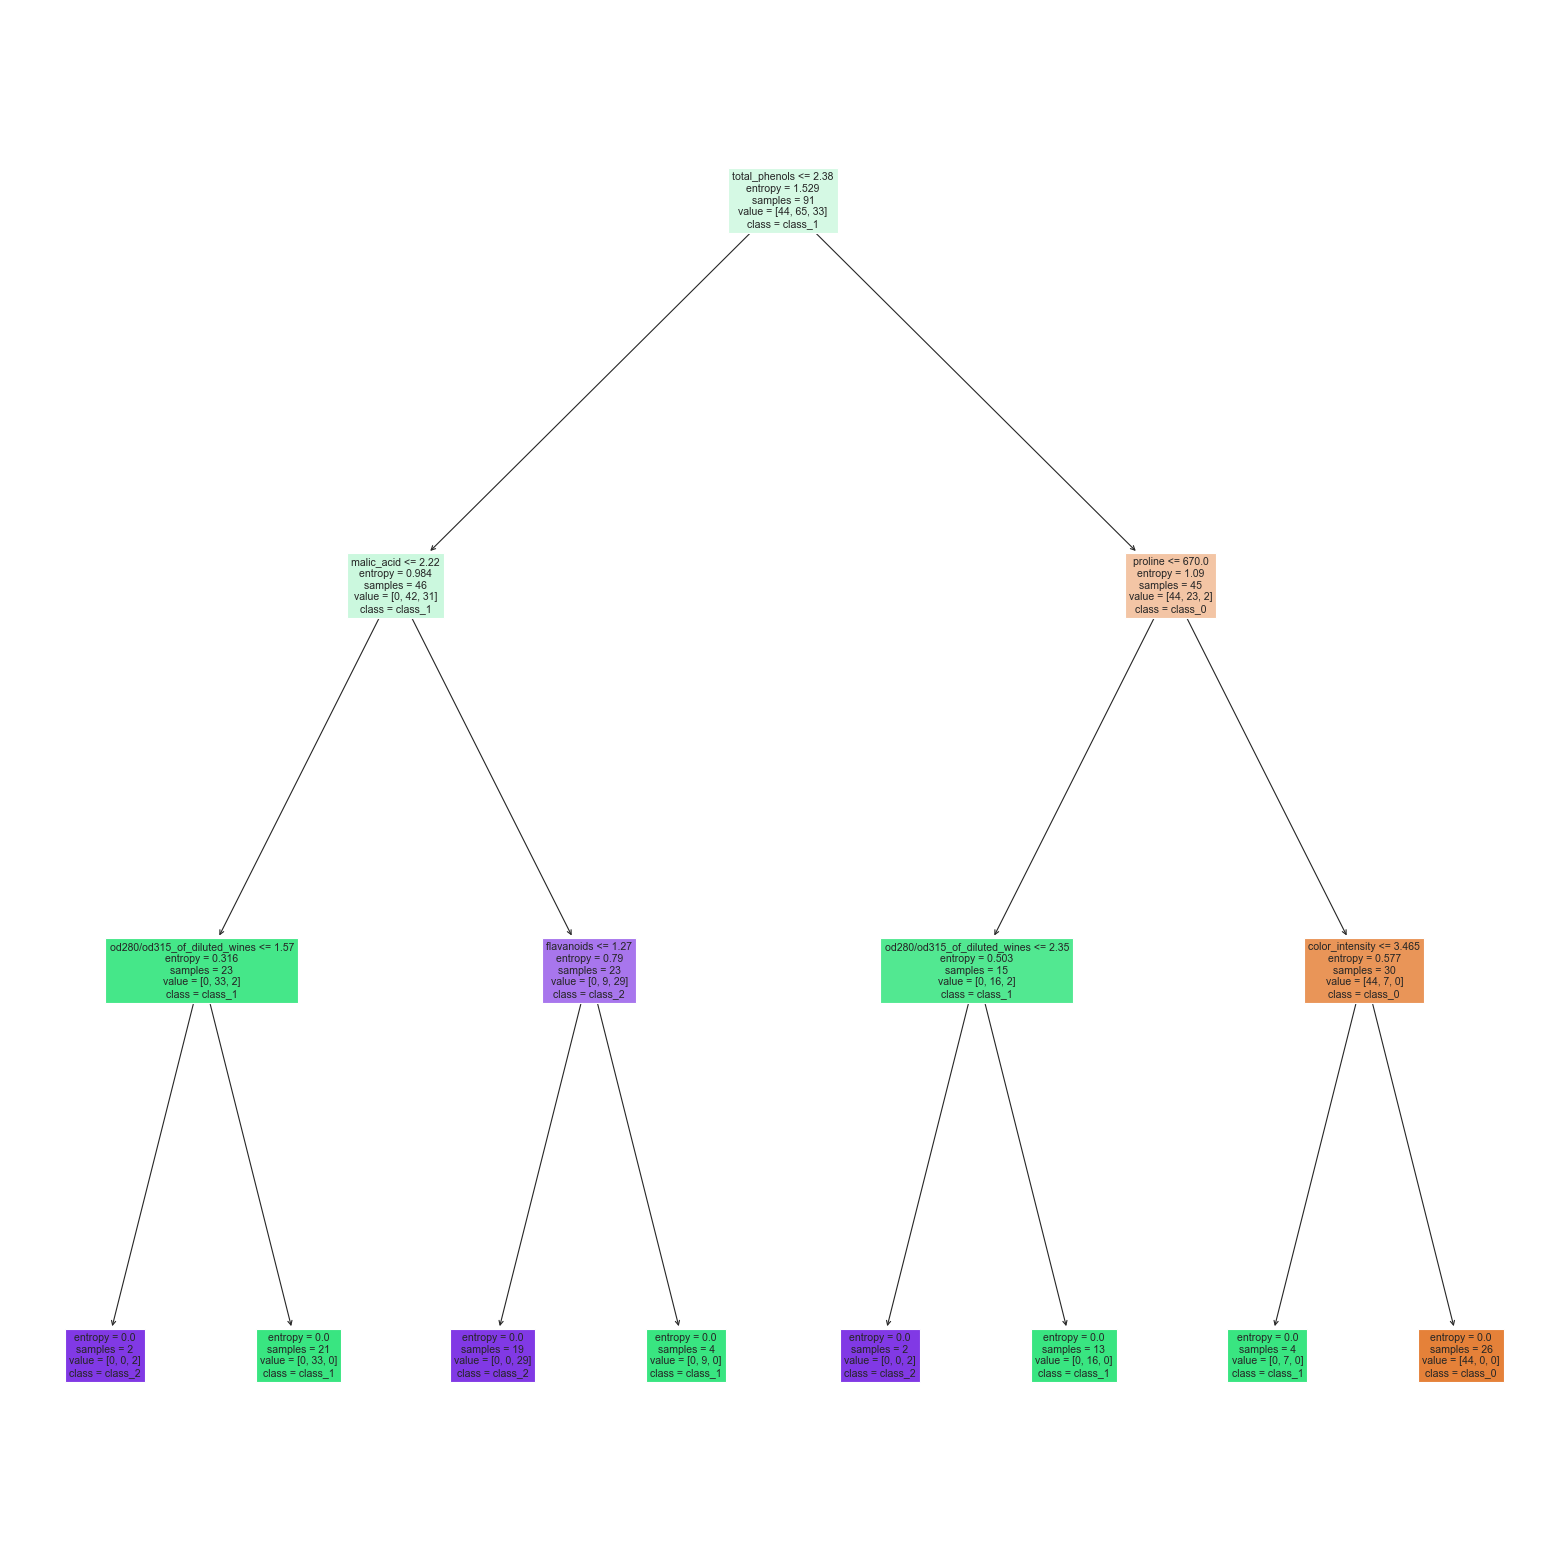

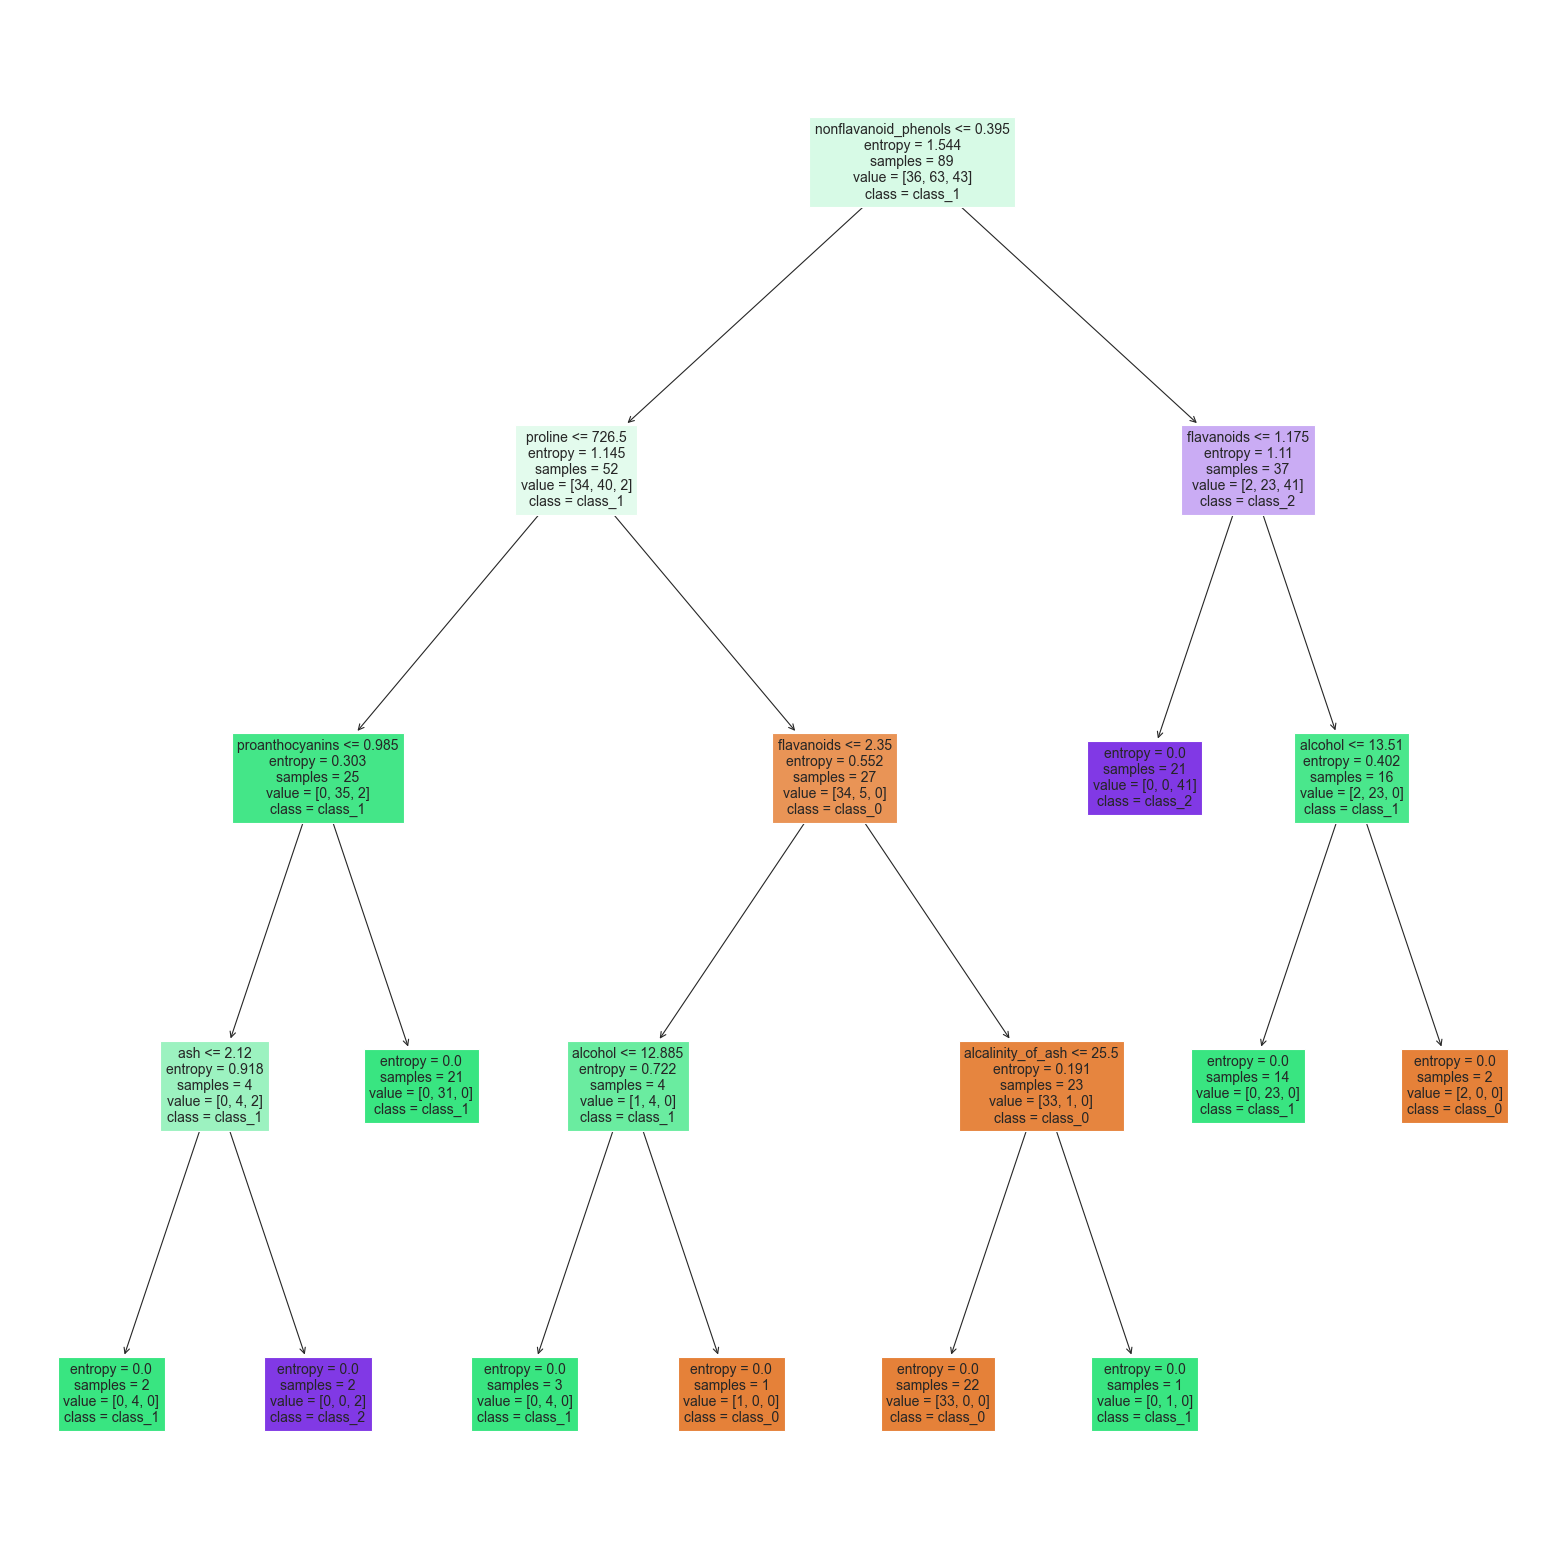

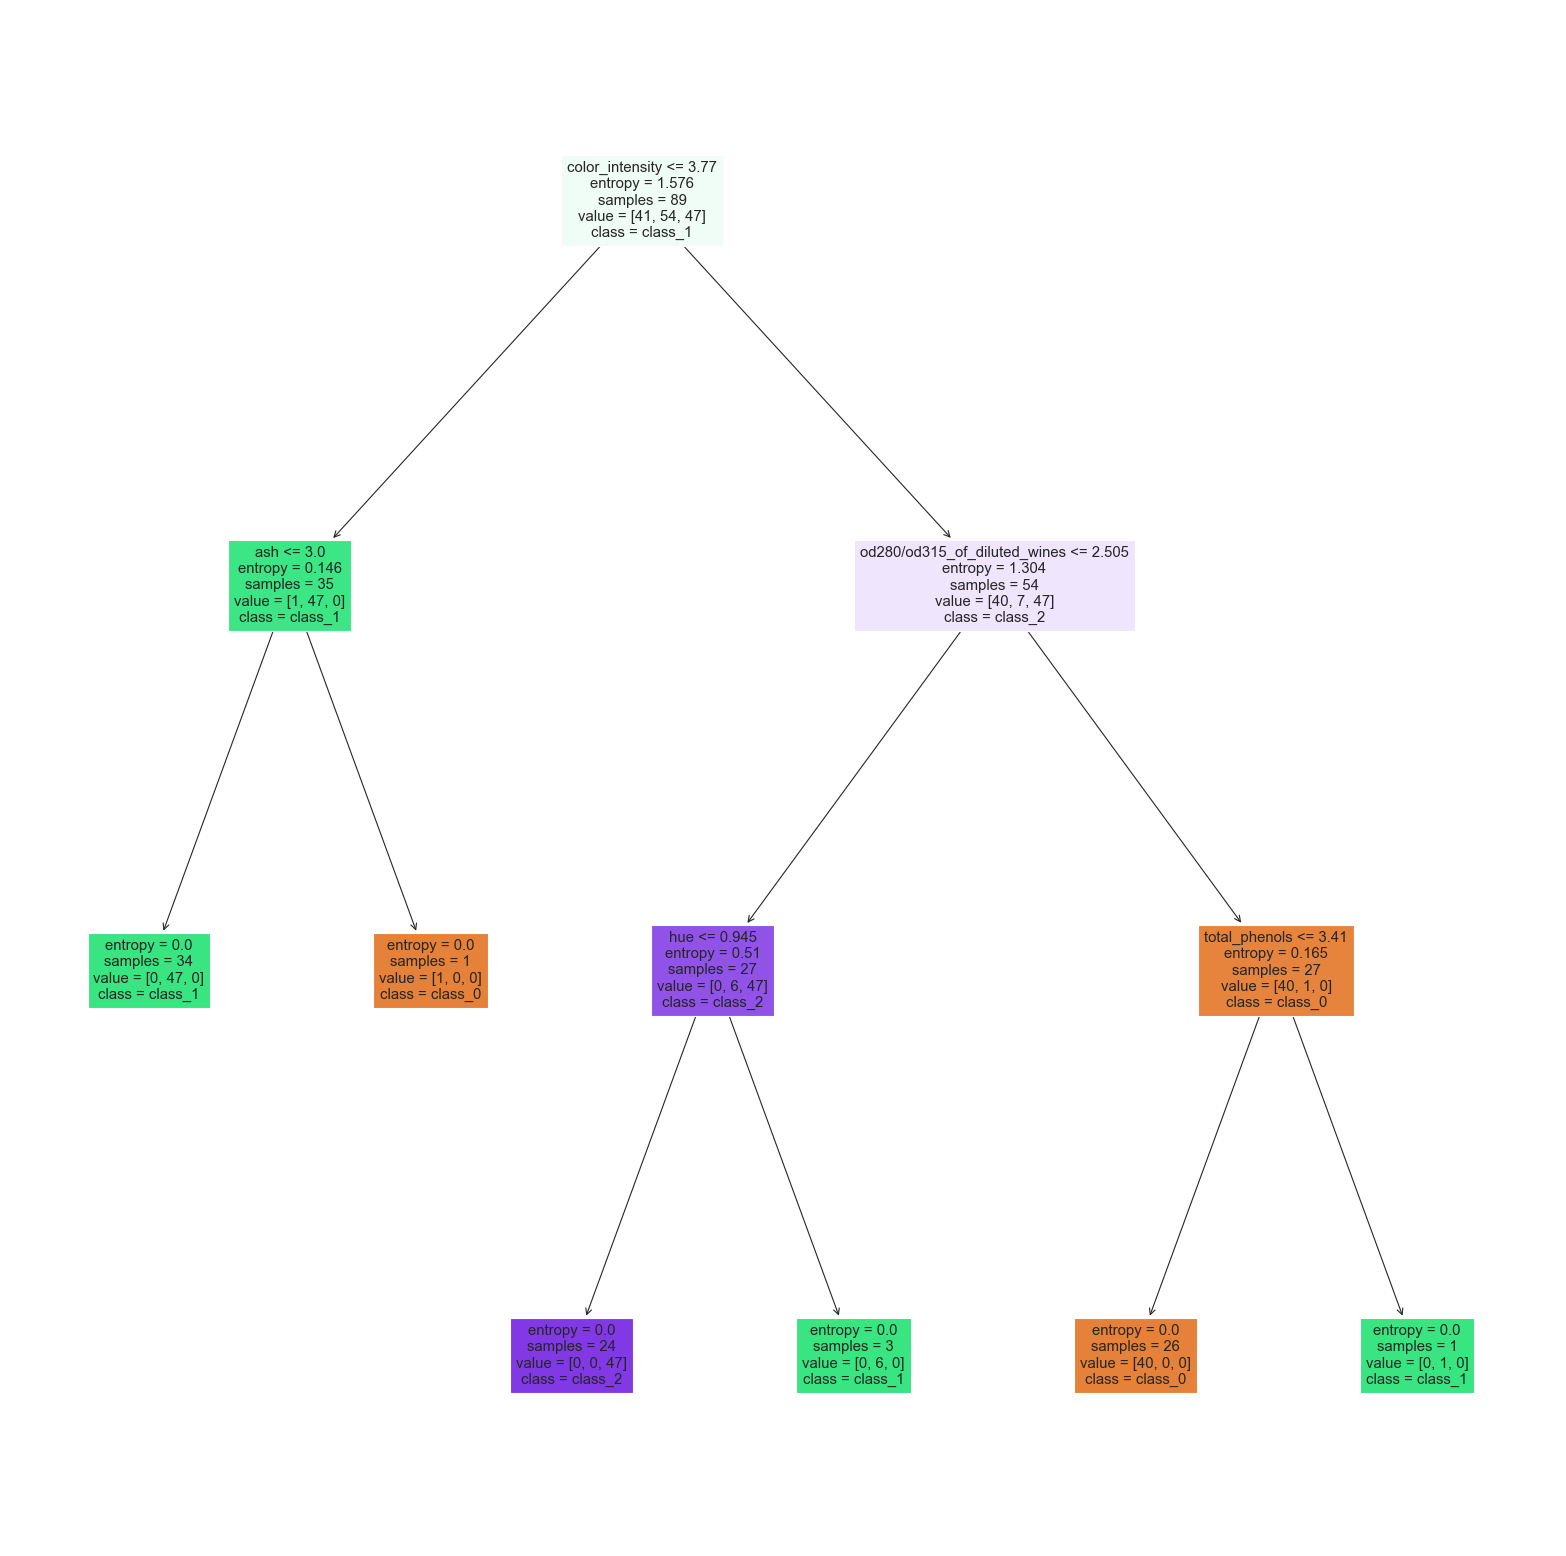

In [157]:
for forest_tree in model_forest.estimators_:
    figure(figsize=(25, 25), dpi=80)
    tree.plot_tree(forest_tree, class_names=list(data.target_names), filled=True, feature_names=list(data.feature_names))
    plt.show()

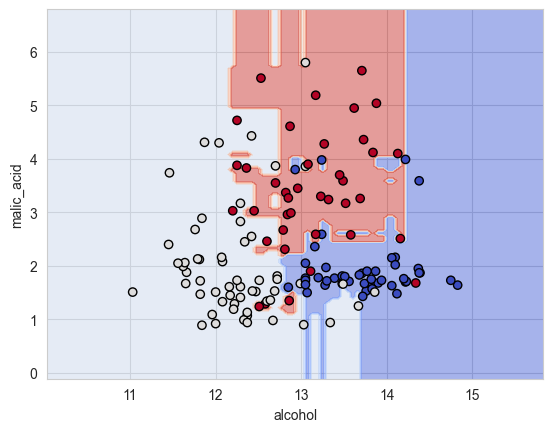

In [158]:
X_train_cols = X_train[:, :2] 
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', max_depth=10, random_state=42).fit(X_train_cols, y_train)
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=data.feature_names[0], ylabel=data.feature_names[1],
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

disp.ax_.scatter(X_train[:, 0], X_train[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.show()

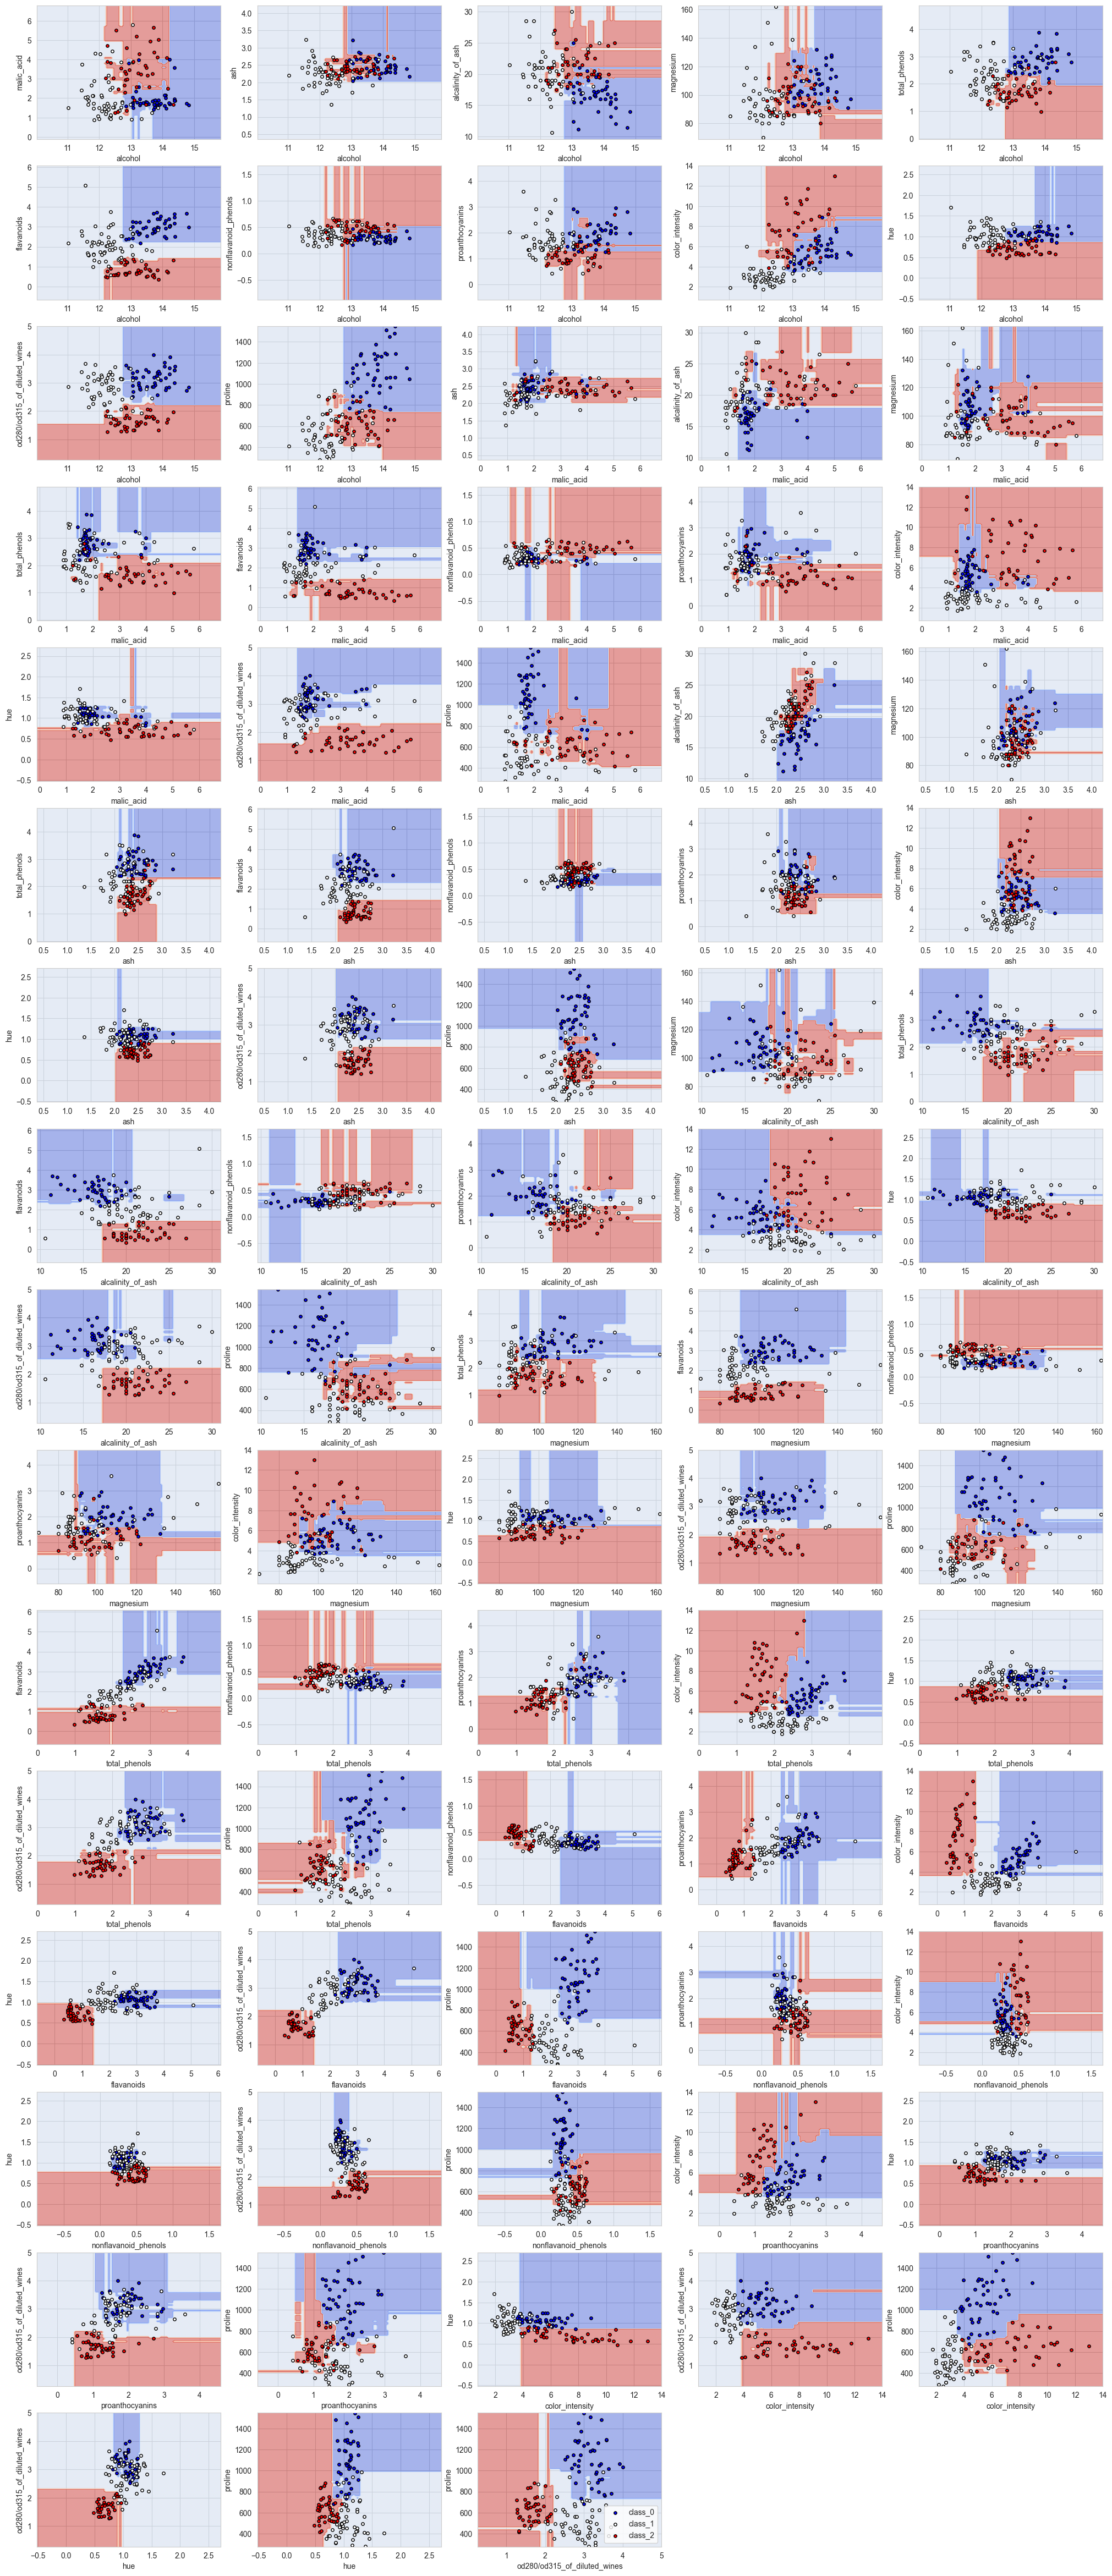

In [159]:
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red
plot_step = 0.02

plt.figure(figsize=(25, 60))

for pair_idx, pair in enumerate(sorted(unique_combinations)):

    X_train_cols = X_train[:, pair]

    classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', max_depth=10, 
                                        random_state=42).fit(X_train_cols, y_train)

    ax = plt.subplot(16, 5, pair_idx + 1)
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_train_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0],
                    X_train_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.legend(loc="lower right");

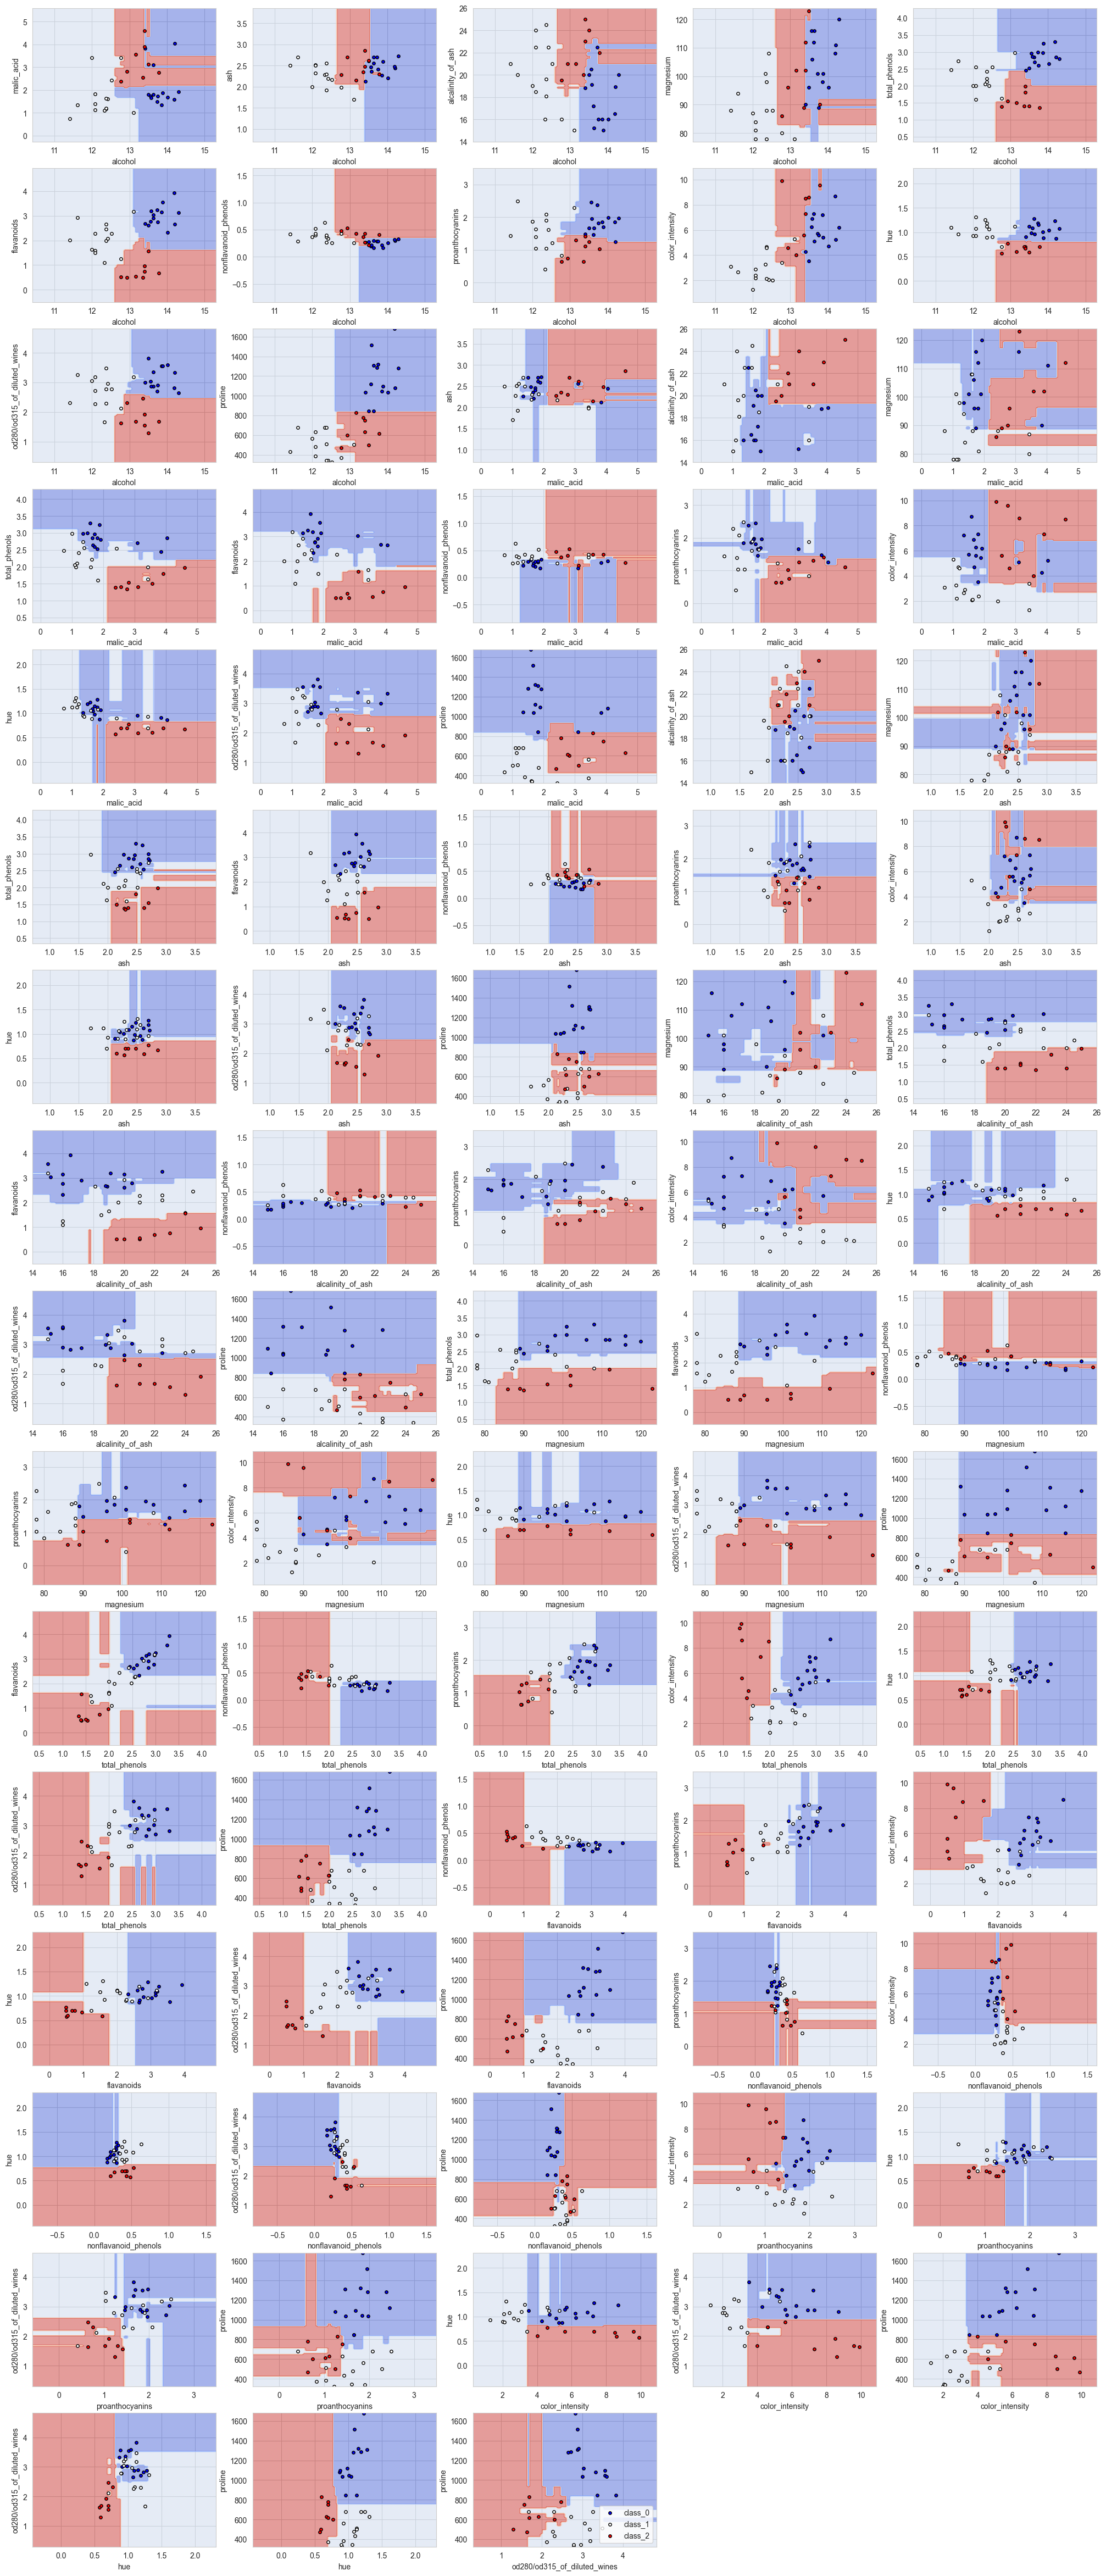

In [160]:
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red
plot_step = 0.02

plt.figure(figsize=(25, 60))

for pair_idx, pair in enumerate(sorted(unique_combinations)):

    X_test_cols = X_test[:, pair]

    classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', max_depth=10, 
                                        random_state=42).fit(X_test_cols, y_test)

    ax = plt.subplot(16, 5, pair_idx + 1)
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_test_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_test == i)
        plt.scatter(X_test_cols[idx, 0],
                    X_test_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.legend(loc="lower right");